# `Business Understanding`

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.

 

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

 

The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house, and

How well those variables describe the price of a house.

 

Also, determine the optimal value of lambda for ridge and lasso regression.

## `Business Goal`

You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

## `Importing Essential Library`

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
# %matplotlib notebook
from sklearn.preprocessing import LabelEncoder
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import Image  
from six import StringIO  
from sklearn.tree import export_graphviz
import pydotplus, graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error


#  3) `Reading And Understanding The Data`

### 3.1 Importing The Input File

In [2]:
data=pd.read_csv('train.csv')
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

## 3.2 Inspecting The Dataframe

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

- These Columns should in proper format `YearBuilt` ,`YearRemodAdd` , `GarageYrBlt`,`YrSold`

## `Summary of Dataset`

In [4]:
data.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

- Outlier is present in many of the columns

In [5]:
data.describe(exclude=['number'])

MSZoning Street Alley LotShape LandContour Utilities LotConfig  \
count      1460   1460    91     1460        1460      1460      1460   
unique        5      2     2        4           4         2         5   
top          RL   Pave  Grvl      Reg         Lvl    AllPub    Inside   
freq       1151   1454    50      925        1311      1459      1052   

       LandSlope Neighborhood Condition1  ... GarageType GarageFinish  \
count       1460         1460       1460  ...       1379         1379   
unique         3           25          9  ...          6            3   
top          Gtl        NAmes       Norm  ...     Attchd          Unf   
freq        1382          225       1260  ...        870          605   

       GarageQual GarageCond PavedDrive PoolQC  Fence MiscFeature SaleType  \
count        1379       1379       1460      7    281          54     1460   
unique          5          5          3      3      4           4        9   
top            TA         TA          Y     Gd  MnPrv        Shed       WD   
freq         1311       1326       1340      3    157          49     1267   

       SaleCondition  
count           1460  
unique             6  
top           Normal  
freq            1198  

[4 rows x 43 columns]

## 3.3 Null Value Calculation

In [6]:

def miss_value(data):
    d1={}
    miss=[]
    s1=[]
    col=[]
    label=[]
    for i in data.columns:
        miss.append(data[i].isna().sum())
        s1.append((data[i].isna().mean()).round(2)*100)
        label.append(data[i].nunique())
        col.append(i)
        d1={'columns_name':col,'Missing_Value':miss,'Percentage_missing_value':s1,'Labels':label}
        
    return pd.DataFrame(d1)



In [7]:
miss=miss_value(data)
miss

columns_name  Missing_Value  Percentage_missing_value  Labels
0              Id              0                       0.0    1460
1      MSSubClass              0                       0.0      15
2        MSZoning              0                       0.0       5
3     LotFrontage            259                      18.0     110
4         LotArea              0                       0.0    1073
..            ...            ...                       ...     ...
76         MoSold              0                       0.0      12
77         YrSold              0                       0.0       5
78       SaleType              0                       0.0       9
79  SaleCondition              0                       0.0       6
80      SalePrice              0                       0.0     663

[81 rows x 4 columns]

In [8]:
miss_columns=miss[miss['Missing_Value']>0]
miss_columns

columns_name  Missing_Value  Percentage_missing_value  Labels
3    LotFrontage            259                      18.0     110
6          Alley           1369                      94.0       2
25    MasVnrType              8                       1.0       4
26    MasVnrArea              8                       1.0     327
30      BsmtQual             37                       3.0       4
31      BsmtCond             37                       3.0       4
32  BsmtExposure             38                       3.0       4
33  BsmtFinType1             37                       3.0       6
35  BsmtFinType2             38                       3.0       6
42    Electrical              1                       0.0       5
57   FireplaceQu            690                      47.0       5
58    GarageType             81                       6.0       6
59   GarageYrBlt             81                       6.0      97
60  GarageFinish             81                       6.0       3
63    GarageQual             81                       6.0       5
64    GarageCond             81                       6.0       5
72        PoolQC           1453                     100.0       3
73         Fence           1179                      81.0       4
74   MiscFeature           1406                      96.0       4

## 3.4 Check for Duplicate rows

In [9]:
data.duplicated().sum()

0

# 4) Data Cleaning

### 4.1 Delete High Null Columns

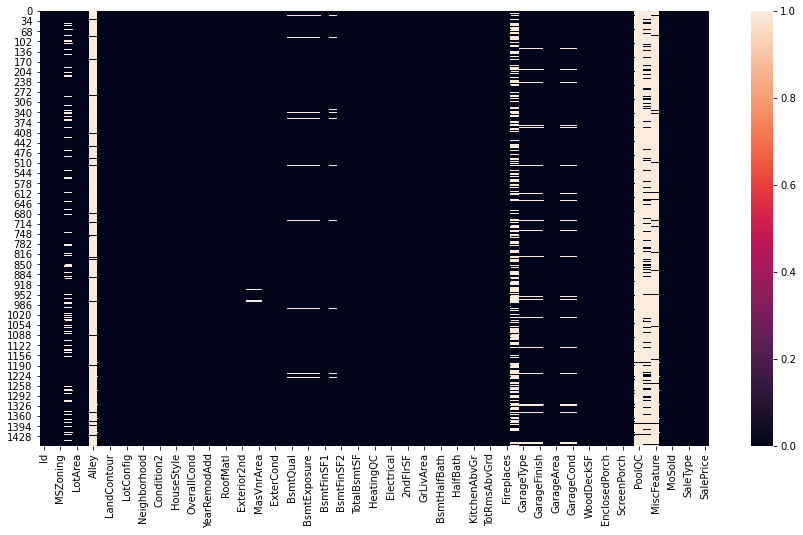

In [10]:
plt.figure(figsize=(15,8))
sns.heatmap(data.isna())
plt.show()

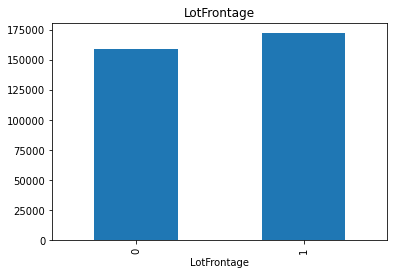

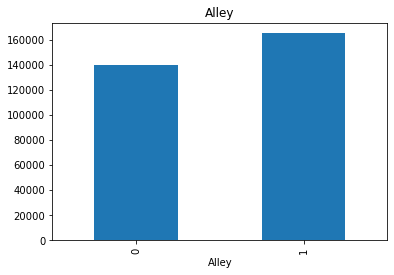

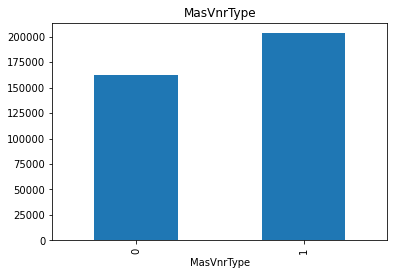

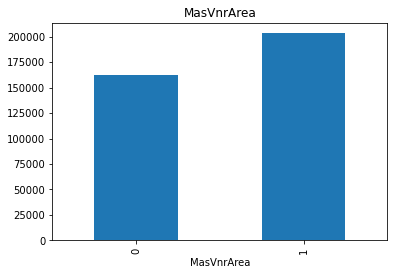

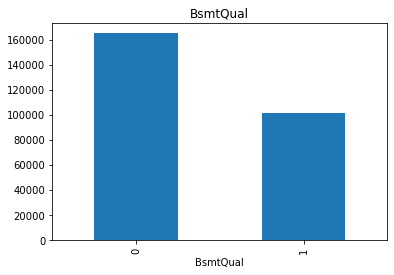

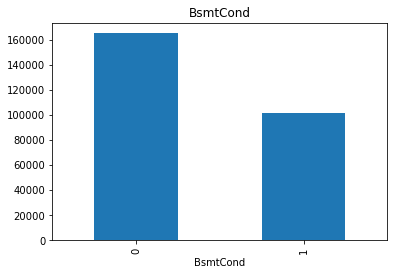

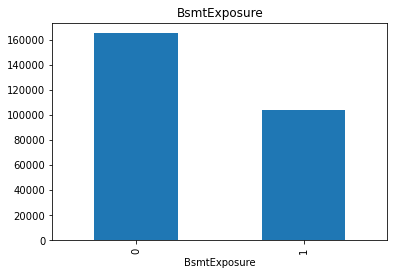

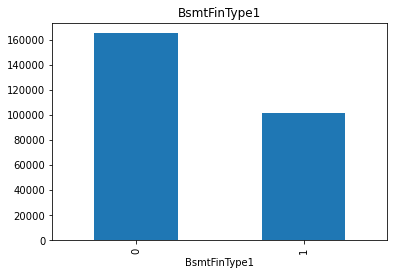

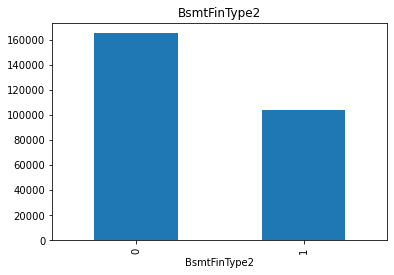

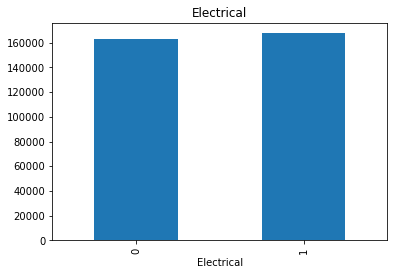

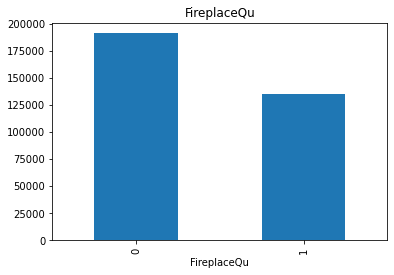

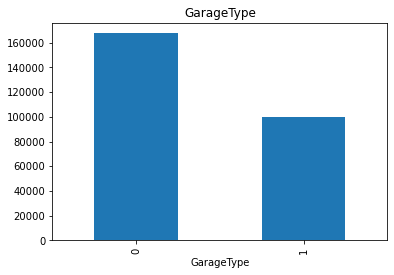

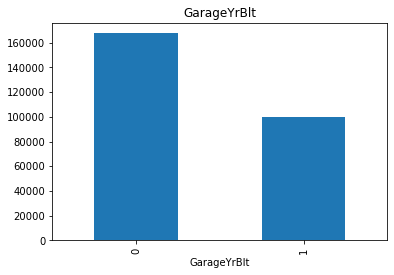

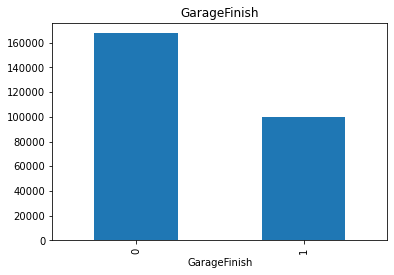

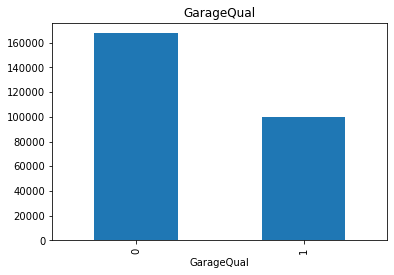

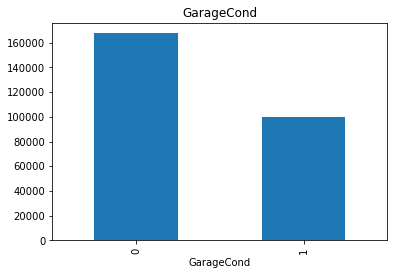

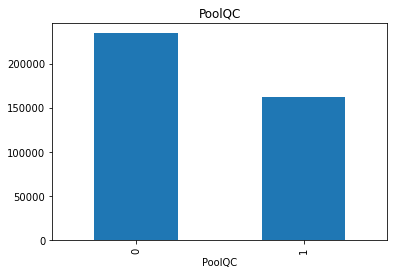

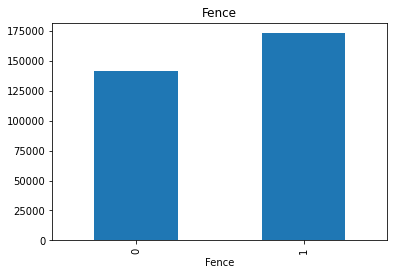

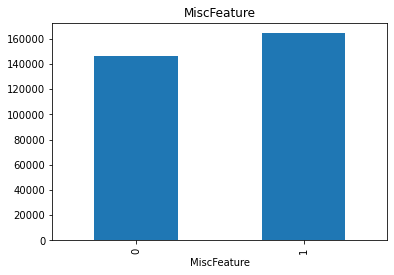

In [11]:
for feature in miss_columns['columns_name']:
    dataset = data.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    dataset[feature] = np.where(dataset[feature].isnull(), 1, 0)
    
    # let's calculate the mean SalePrice where the information is missing or present
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    plt.title(feature)
    plt.show()

- Here With the relation between the missing values and the dependent variable is clearly visible.So We need to replace these nan values with something meaningful which we will do in the Feature Engineering section

In [12]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

### 4.2 Segregating Categorical & Numerical Value

In [13]:
categorical_col=data.describe(include='object').columns
categorical_col

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [14]:
numerical_col=data.describe(include='number').columns
numerical_col

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [15]:
## Numerical variables are usually of 2 type
## 1. Continous variable and Discrete Variables
continuous_var=[]

for i in data.columns:
    if (data[i].dtype=='int64' or data[i].dtype=='float64') and data[i].nunique()>25:
        continuous_var.append(i)
print(continuous_var)    
   

['Id', 'LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'SalePrice']


In [16]:
discrete_var=[]
for i in data.columns:
    if (data[i].dtype=='int64' or data[i].dtype=='float64') and data[i].nunique()<=25:
        discrete_var.append(i)
print(discrete_var) 

['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', '3SsnPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


### 4.3 Categorical Columns Null Value Treatment

In [17]:
NaN_col=miss_value(data)

In [18]:
NaN_col=NaN_col[(NaN_col['Percentage_missing_value']>0.0) &(NaN_col['Percentage_missing_value']<40.0)]
NaN_col

columns_name  Missing_Value  Percentage_missing_value  Labels
3    LotFrontage            259                      18.0     110
25    MasVnrType              8                       1.0       4
26    MasVnrArea              8                       1.0     327
30      BsmtQual             37                       3.0       4
31      BsmtCond             37                       3.0       4
32  BsmtExposure             38                       3.0       4
33  BsmtFinType1             37                       3.0       6
35  BsmtFinType2             38                       3.0       6
58    GarageType             81                       6.0       6
59   GarageYrBlt             81                       6.0      97
60  GarageFinish             81                       6.0       3
63    GarageQual             81                       6.0       5
64    GarageCond             81                       6.0       5

In [19]:
def column_replace_nan(replace,col):
    data[col]=data[col].replace({np.nan:replace})
    return data[col].isna().sum()

#### MasVnrType column

In [20]:
data['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn', nan], dtype=object)

In [21]:
data['MasVnrType']=data['MasVnrType'].replace({np.nan:'None'})

In [22]:
data['MasVnrType'].isna().sum()

0

In [23]:
data['MasVnrType'].value_counts()

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

#### BasementQuality Column

In [24]:
data['BsmtQual'].isna().sum()

37

In [25]:

data['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [26]:
data['BsmtQual'].value_counts()

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64

In [27]:
column_replace_nan('No Basement','BsmtQual')

0

In [28]:
data['BsmtQual'].value_counts()

TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64

#### BsmtCond columns

In [29]:
data['BsmtCond'].isna().sum()

37

In [30]:
data['BsmtCond'].value_counts()

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64

In [31]:
column_replace_nan('No Basement','BsmtCond')

0

In [32]:
data['BsmtCond'].value_counts()

TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64

#### BsmtExposure Column

In [33]:
data['BsmtExposure'].isna().sum()

38

In [34]:
data['BsmtExposure'].value_counts()

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64

In [35]:
column_replace_nan('No Basement','BsmtExposure')

0

In [36]:
data['BsmtExposure'].value_counts()

No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64

#### BsmtFinType1 Column

In [37]:
data['BsmtFinType1'].isna().sum()

37

In [38]:
column_replace_nan('No Basement','BsmtFinType1')

0

In [39]:

data['BsmtFinType1'].value_counts()

Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64

#### BsmtFinType2 Column 

In [40]:
data['BsmtFinType2'].isna().sum()


38

In [41]:
data['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

In [42]:
column_replace_nan
('No Basement','BsmtFinType2')

('No Basement', 'BsmtFinType2')

In [43]:
data['BsmtFinType2'].value_counts()

Unf    1256
Rec      54
LwQ      46
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

### GarageType column

In [44]:
data['GarageType'].isna().sum()

81

In [45]:
data['GarageType'].value_counts()

Attchd     870
Detchd     387
BuiltIn     88
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

In [46]:
column_replace_nan('No Garge','GarageType')

0

In [47]:
data['GarageType'].value_counts()

Attchd      870
Detchd      387
BuiltIn      88
No Garge     81
Basment      19
CarPort       9
2Types        6
Name: GarageType, dtype: int64

#### GarageFinish Column

In [48]:
data['GarageFinish'].isna().sum()

81

In [49]:
data['GarageFinish'].value_counts()

Unf    605
RFn    422
Fin    352
Name: GarageFinish, dtype: int64

In [50]:
column_replace_nan('No Garage','GarageFinish')

0

In [51]:
data['GarageFinish'].value_counts()

Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64


#### GarageQual	 Column

In [52]:
data['GarageQual'].isna().sum()

81

In [53]:
data['GarageQual'].value_counts()

TA    1311
Fa      48
Gd      14
Po       3
Ex       3
Name: GarageQual, dtype: int64

In [54]:
column_replace_nan('No Garage','GarageQual')

0

In [55]:
data['GarageQual'].value_counts()

TA           1311
No Garage      81
Fa             48
Gd             14
Po              3
Ex              3
Name: GarageQual, dtype: int64

In [56]:
data['GarageQual'].isna().sum()

0

#### GarageCond Column

In [57]:
data['GarageCond'].isna().sum()

81

In [58]:
data['GarageCond'].value_counts()

TA    1326
Fa      35
Gd       9
Po       7
Ex       2
Name: GarageCond, dtype: int64

In [59]:
column_replace_nan('No Garage','GarageCond')

0

In [60]:
data['GarageCond'].value_counts()

TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64

In [61]:
data['GarageCond'].isna().sum()


0

## 4.4 Numerical Columns Null Value Treatment

#### MasVnrArea Column

In [62]:
K=miss_value(data)
K[K['Missing_Value']>0]

columns_name  Missing_Value  Percentage_missing_value  Labels
3    LotFrontage            259                      18.0     110
6          Alley           1369                      94.0       2
26    MasVnrArea              8                       1.0     327
35  BsmtFinType2             38                       3.0       6
42    Electrical              1                       0.0       5
57   FireplaceQu            690                      47.0       5
59   GarageYrBlt             81                       6.0      97
72        PoolQC           1453                     100.0       3
73         Fence           1179                      81.0       4
74   MiscFeature           1406                      96.0       4

### Deleting The High Percentage Missing Column

In [63]:
high_na_columns=K[K['Percentage_missing_value']>40]['columns_name']
data.drop(high_na_columns,1,inplace=True)

In [64]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0   1          60       RL         65.0     8450   Pave      Reg         Lvl   
1   2          20       RL         80.0     9600   Pave      Reg         Lvl   
2   3          60       RL         68.0    11250   Pave      IR1         Lvl   
3   4          70       RL         60.0     9550   Pave      IR1         Lvl   
4   5          60       RL         84.0    14260   Pave      IR1         Lvl   

  Utilities LotConfig  ... EnclosedPorch 3SsnPorch ScreenPorch PoolArea  \
0    AllPub    Inside  ...             0         0           0        0   
1    AllPub       FR2  ...             0         0           0        0   
2    AllPub    Inside  ...             0         0           0        0   
3    AllPub    Corner  ...           272         0           0        0   
4    AllPub       FR2  ...             0         0           0        0   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0       0      2    2008        WD         Normal     208500  
1       0      5    2007        WD         Normal     181500  
2       0      9    2008        WD         Normal     223500  
3       0      2    2006        WD        Abnorml     140000  
4       0     12    2008        WD         Normal     250000  

[5 rows x 76 columns]

In [65]:
K[K['Missing_Value']>0]

columns_name  Missing_Value  Percentage_missing_value  Labels
3    LotFrontage            259                      18.0     110
6          Alley           1369                      94.0       2
26    MasVnrArea              8                       1.0     327
35  BsmtFinType2             38                       3.0       6
42    Electrical              1                       0.0       5
57   FireplaceQu            690                      47.0       5
59   GarageYrBlt             81                       6.0      97
72        PoolQC           1453                     100.0       3
73         Fence           1179                      81.0       4
74   MiscFeature           1406                      96.0       4

In [66]:
data['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

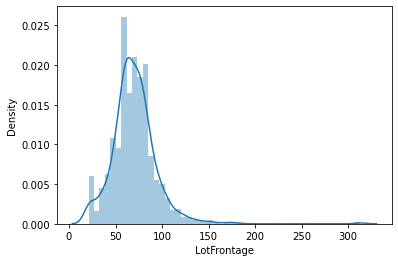

In [67]:
sns.distplot(data['LotFrontage'])

## It is Normally Distrubted and so we can either fill with Mean or Median

In [68]:
data['LotFrontage']=data['LotFrontage'].fillna(data['LotFrontage'].mean())

In [69]:
pd.set_option('display.max_rows',100)
data.isna().sum()

Id                0
MSSubClass        0
MSZoning          0
LotFrontage       0
LotArea           0
Street            0
LotShape          0
LandContour       0
Utilities         0
LotConfig         0
LandSlope         0
Neighborhood      0
Condition1        0
Condition2        0
BldgType          0
HouseStyle        0
OverallQual       0
OverallCond       0
YearBuilt         0
YearRemodAdd      0
RoofStyle         0
RoofMatl          0
Exterior1st       0
Exterior2nd       0
MasVnrType        0
MasVnrArea        8
ExterQual         0
ExterCond         0
Foundation        0
BsmtQual          0
BsmtCond          0
BsmtExposure      0
BsmtFinType1      0
BsmtFinSF1        0
BsmtFinType2     38
BsmtFinSF2        0
BsmtUnfSF         0
TotalBsmtSF       0
Heating           0
HeatingQC         0
CentralAir        0
Electrical        1
1stFlrSF          0
2ndFlrSF          0
LowQualFinSF      0
GrLivArea         0
BsmtFullBath      0
BsmtHalfBath      0
FullBath          0
HalfBath          0


In [70]:
data.dropna(inplace=True)

In [71]:
data.isna().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

# Exploratoray Data Analysis

In [72]:
categorical_col

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [73]:
def cat_graph(data,col):
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    sns.countplot(data[col])
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    sns.boxplot(data=data,x=col,y='SalePrice')
    plt.xticks(rotation=90)
    plt.show()
    

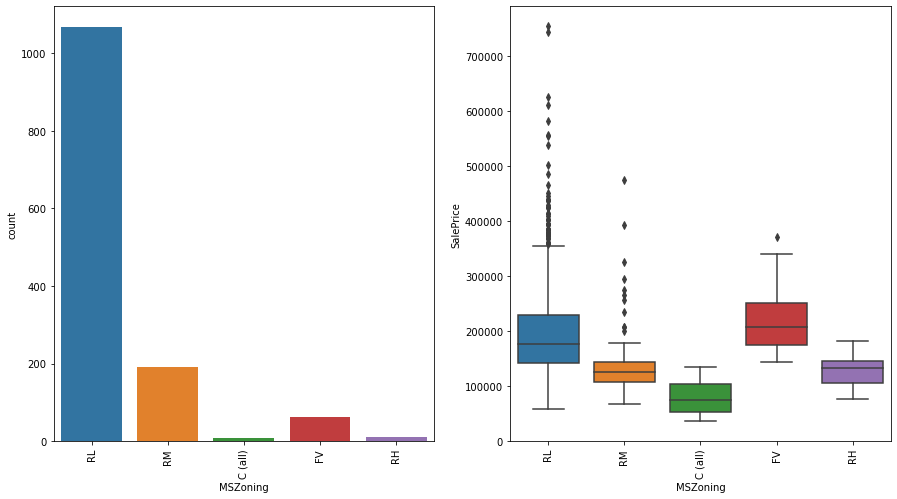

In [74]:
cat_graph(data,'MSZoning')

- We see that Residential Low Density(RL) zoning contribute the highest
- With repect to the Price `Floating Village Residential`has high Price Houses


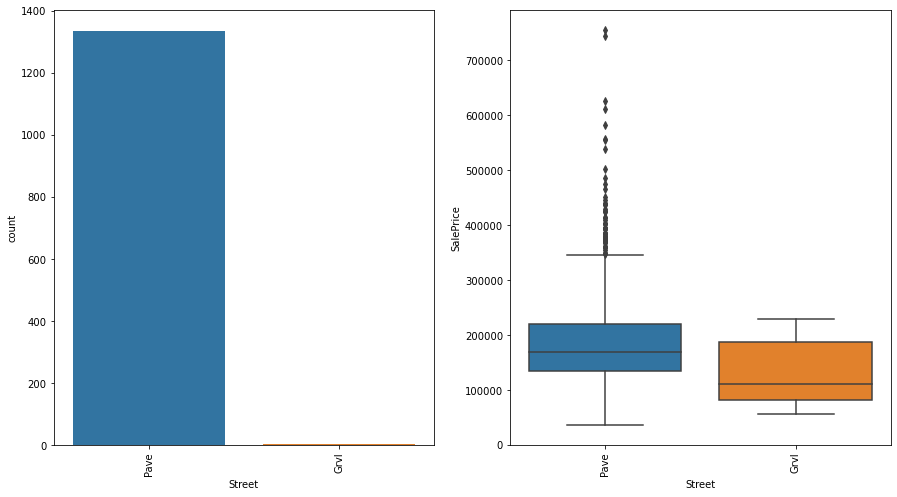

In [75]:
cat_graph(data,'Street')

Data is skewed it dosnt not add any information to model 

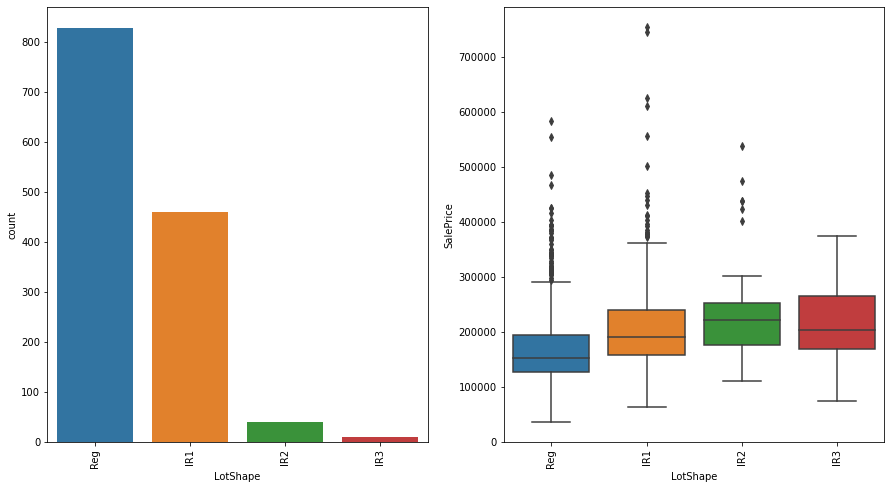

In [76]:
cat_graph(data,'LotShape')

- Regular lot shape  dosent make impact on price like `Slightly irregular` is making

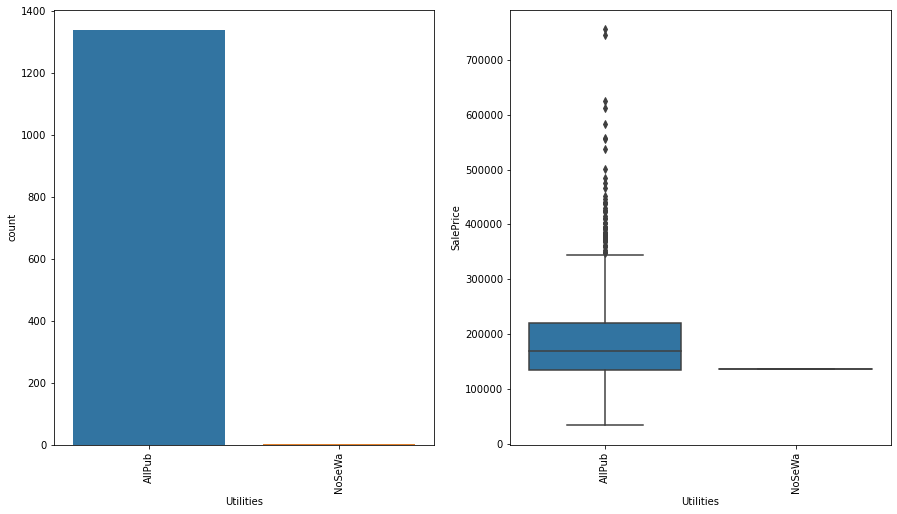

In [77]:
cat_graph(data,'Utilities')

In [78]:
data['Utilities'].value_counts()

AllPub    1338
NoSeWa       1
Name: Utilities, dtype: int64

- As the data is skewed, we can delete the column. It doses add any information to the model.

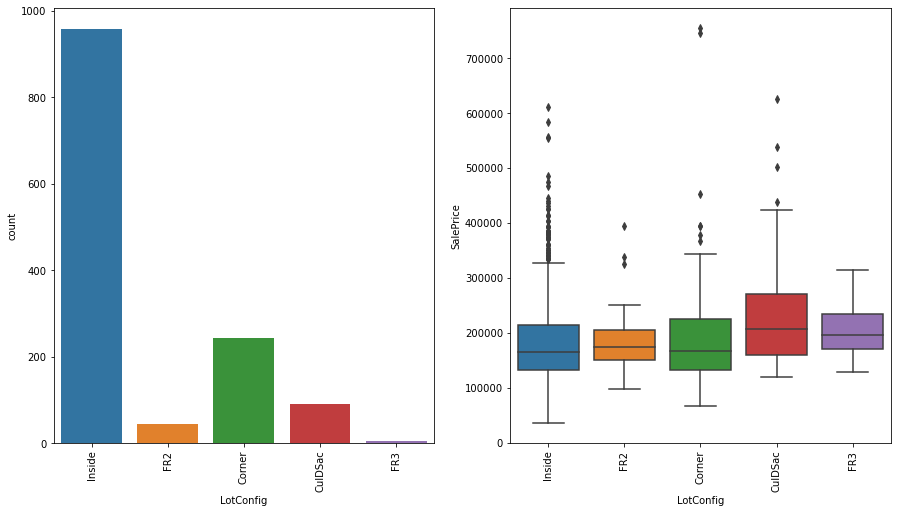

In [79]:
cat_graph(data,'LotConfig')

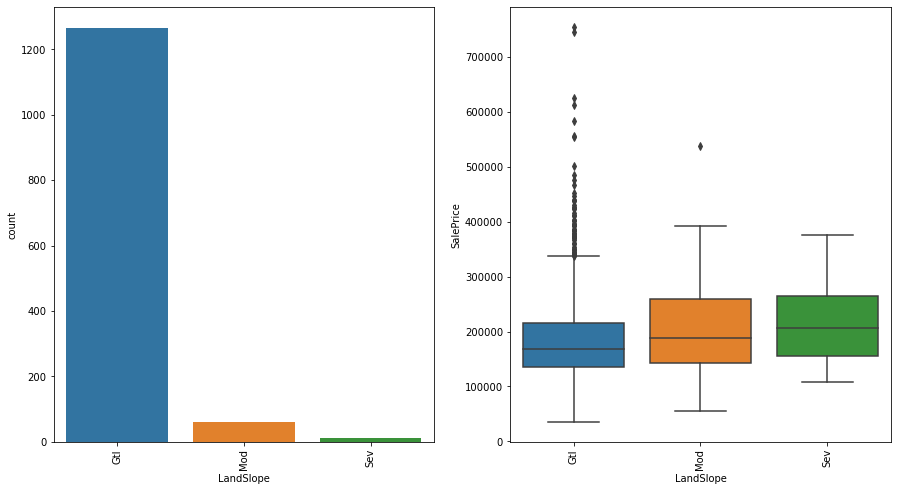

In [80]:
cat_graph(data,'LandSlope')

In [81]:
data['LandSlope'].value_counts(normalize=True)

Gtl    0.945482
Mod    0.045556
Sev    0.008962
Name: LandSlope, dtype: float64

- Gentle slope make more impact than the Moderate Slope and Severe Slope

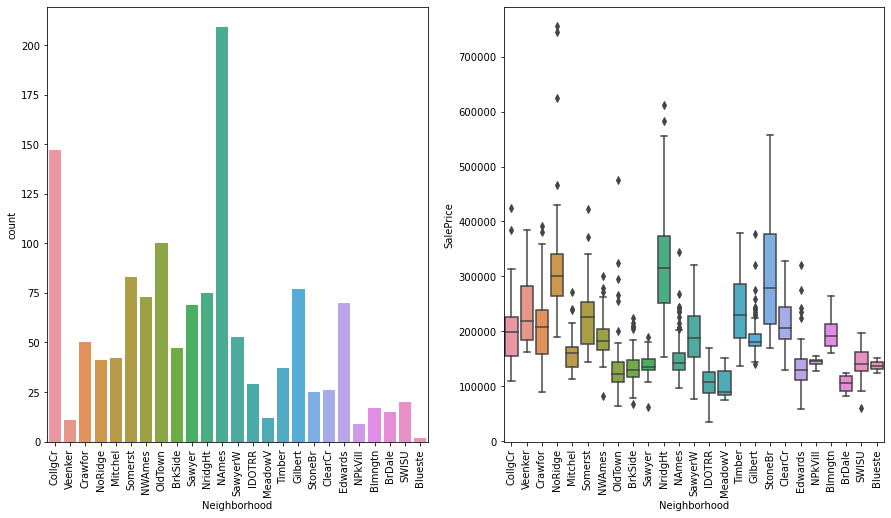

In [82]:
cat_graph(data,'Neighborhood')


- Names has highest in count and in this prices are also

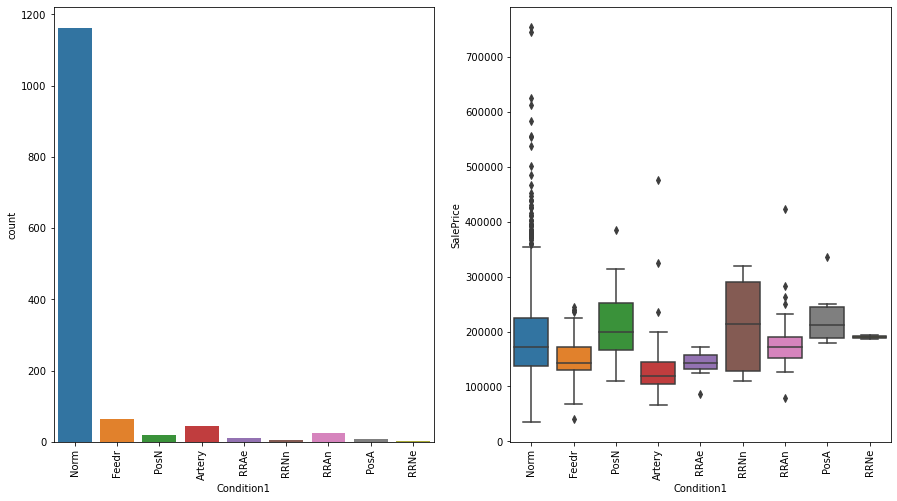

In [83]:
cat_graph(data,'Condition1')

In [84]:
data['Condition1'].value_counts(normalize=True)

Norm      0.868559
Feedr     0.047050
Artery    0.032114
RRAn      0.019417
PosN      0.014190
RRAe      0.007468
PosA      0.005975
RRNn      0.003734
RRNe      0.001494
Name: Condition1, dtype: float64

- Around 86% building are in normal condition

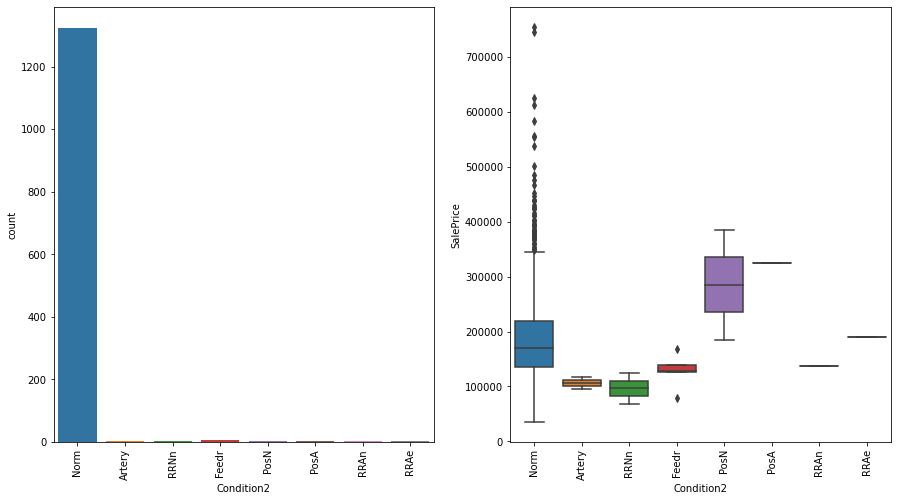

In [85]:
cat_graph(data,'Condition2')

In [86]:
data['Condition2'].value_counts(normalize=True)

Norm      0.989544
Feedr     0.003734
Artery    0.001494
RRNn      0.001494
PosN      0.001494
RRAe      0.000747
RRAn      0.000747
PosA      0.000747
Name: Condition2, dtype: float64

- As the data is skewed, we can delete the column. It doses add any information to the model.

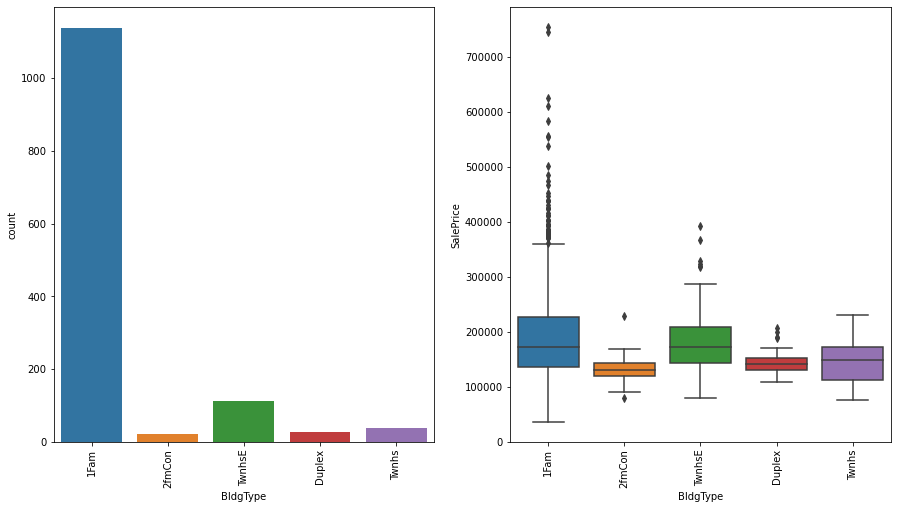

In [87]:
cat_graph(data,'BldgType')

In [88]:
data['BldgType'].value_counts(normalize=True)

1Fam      0.850635
TwnhsE    0.083645
Twnhs     0.028379
Duplex    0.020911
2fmCon    0.016430
Name: BldgType, dtype: float64

- Single-family Detached has highest dwelling

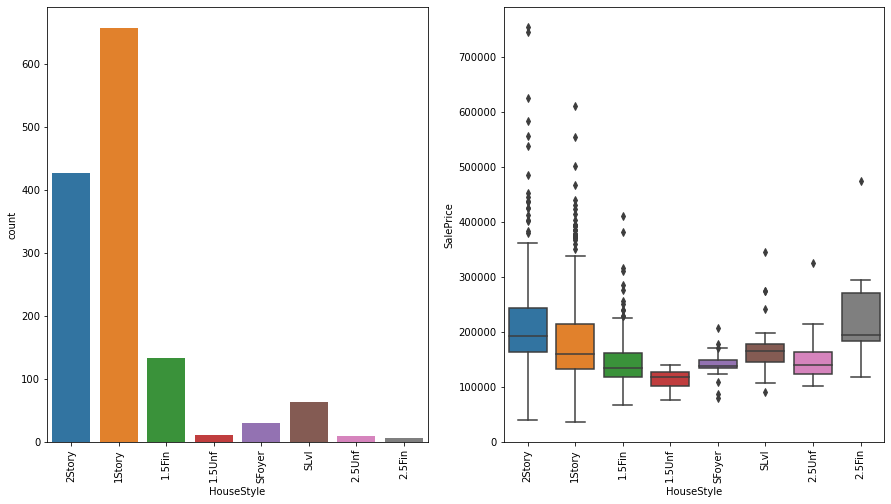

In [89]:
cat_graph(data,'HouseStyle')

- 2story amd 1 story house are more and many people prefer two or one story house

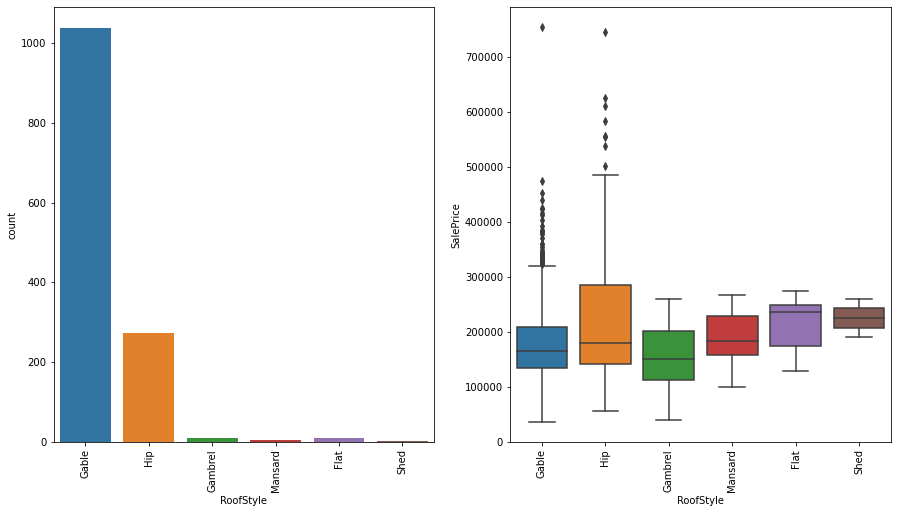

In [90]:
cat_graph(data,'RoofStyle')

- Gable rooftstyle house are more 
- Hip rooftstyle house are high in price

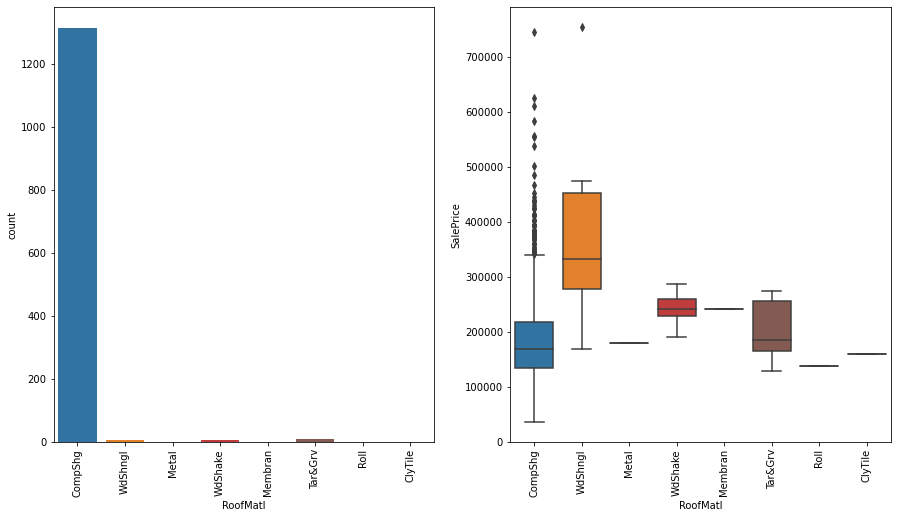

In [91]:
cat_graph(data,'RoofMatl')

- Around 98% of the RoofMaterial is made of `Standard (Composite) Shingle` 
- Data skewed we can delete the column. It doses add any information to the model.

In [92]:
data['RoofMatl'].value_counts(normalize=True)

CompShg    0.982076
Tar&Grv    0.006721
WdShngl    0.004481
WdShake    0.003734
Membran    0.000747
Metal      0.000747
ClyTile    0.000747
Roll       0.000747
Name: RoofMatl, dtype: float64

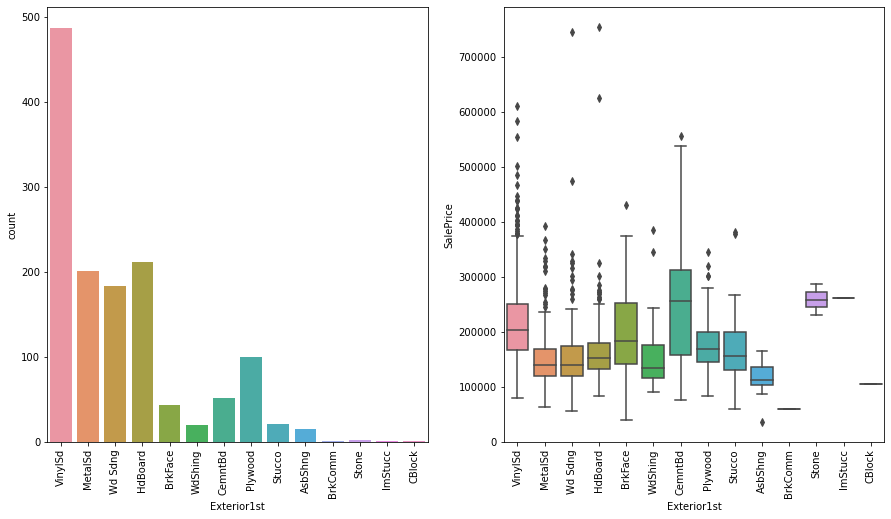

In [93]:
cat_graph(data,'Exterior1st')

- Vinyl Siding show the high  Price house

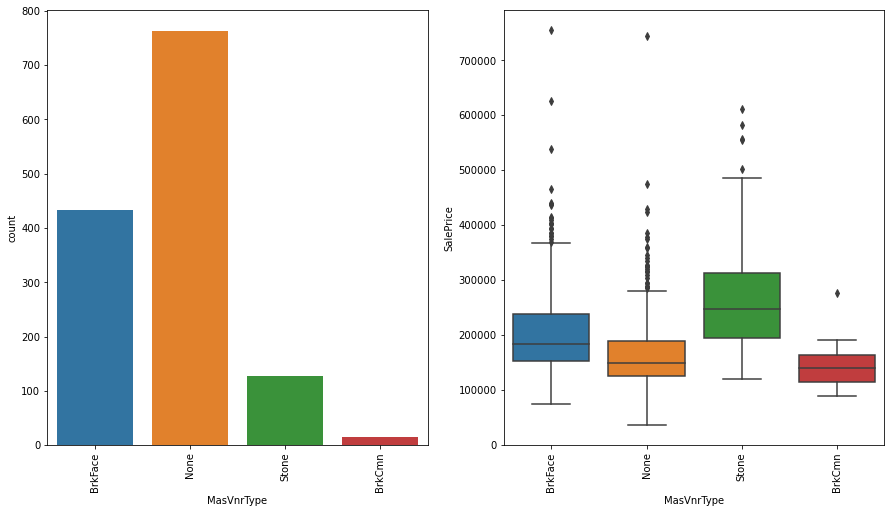

In [94]:
cat_graph(data,'MasVnrType')

- If there is no Masonry veneer then house price will low 
- We choose `stone` Masonry veneer type the house price will we high

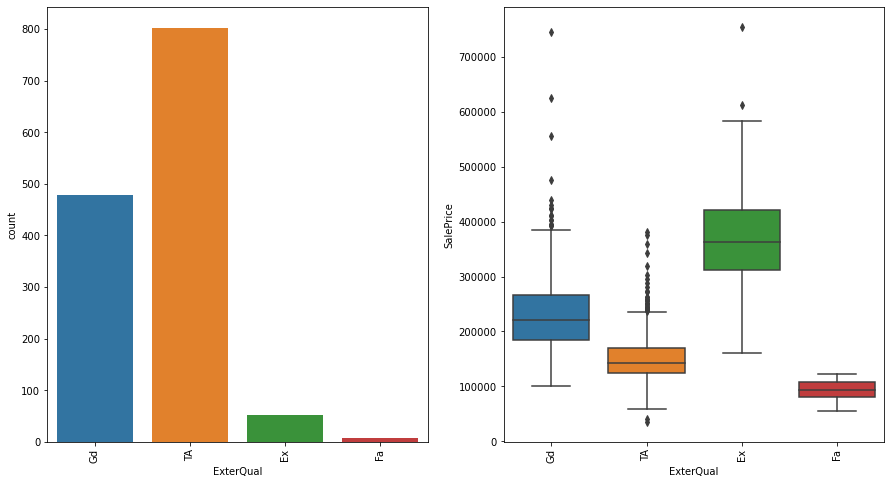

In [95]:
cat_graph(data,'ExterQual')

- Houses which have exteriorquality average there Price will be Low
- Houses with excellent exterior quality then the price will be high

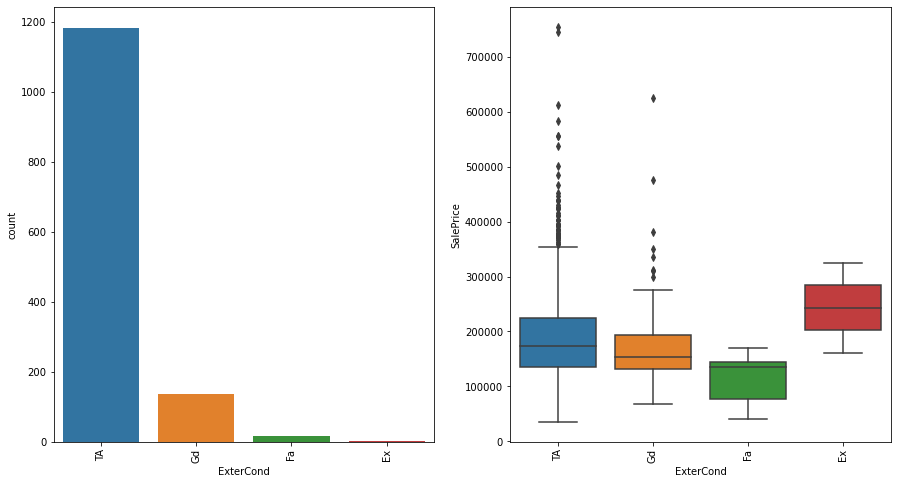

In [96]:
cat_graph(data,'ExterCond')

- Houses with excellent exterior condition then the price will be high

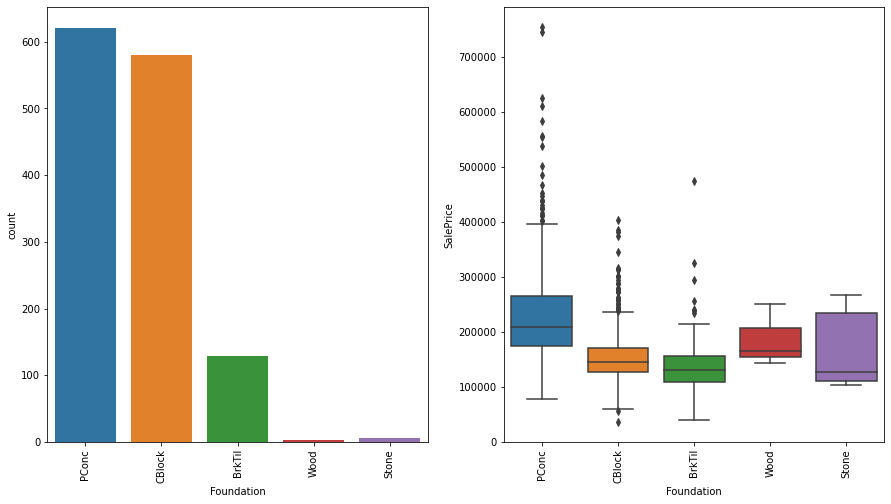

In [97]:
cat_graph(data,'Foundation')

- Houses which have foundation `Poured Contrete` has high Price 	

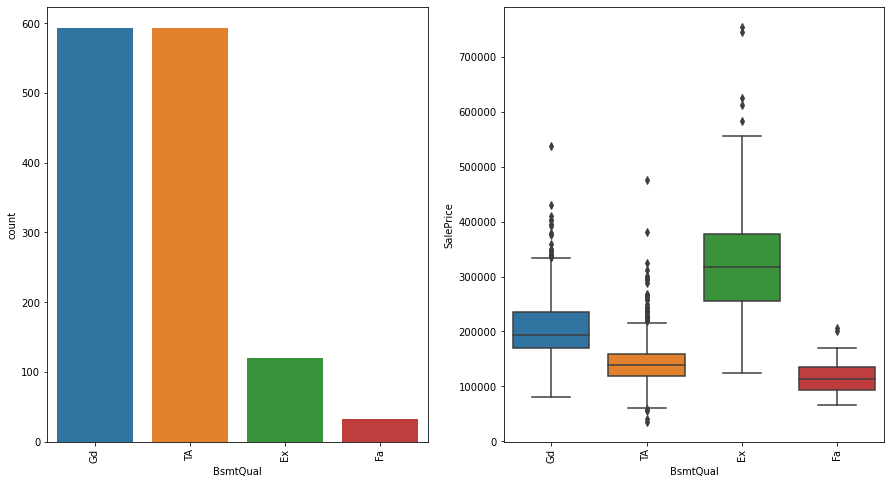

In [98]:
cat_graph(data,'BsmtQual')

- Houses Which have excellent basementquality have high Price
- Houses without Basement shows  low Price

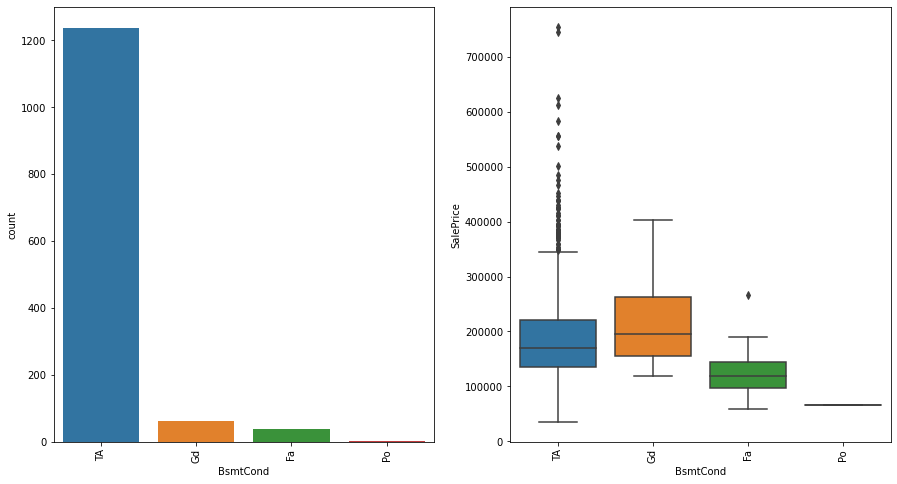

In [99]:
cat_graph(data,'BsmtCond')


In [100]:
data['BsmtCond'].value_counts(normalize=True)

TA    0.924571
Gd    0.046303
Fa    0.028379
Po    0.000747
Name: BsmtCond, dtype: float64

- Basement which are in good condition have high Price

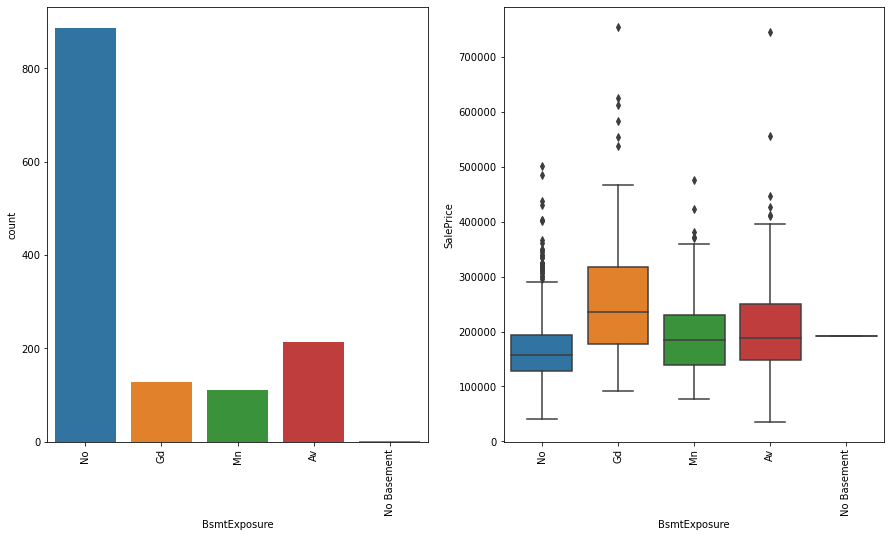

In [101]:
cat_graph(data,'BsmtExposure')

- House with good exposure are  high in Price

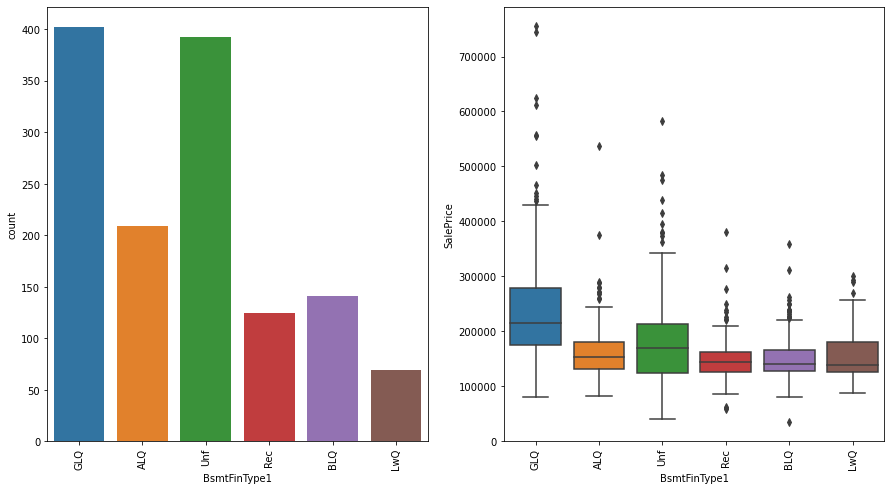

In [102]:
cat_graph(data,'BsmtFinType1')

- Houses with `Good Living Quarters` has higher in price

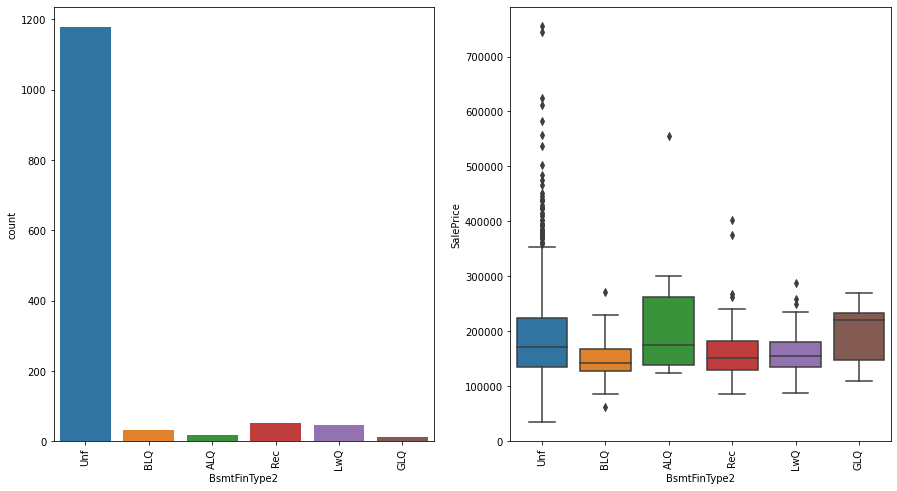

In [103]:
cat_graph(data,'BsmtFinType2')

- Houses with Good Living Quarters has higher in price

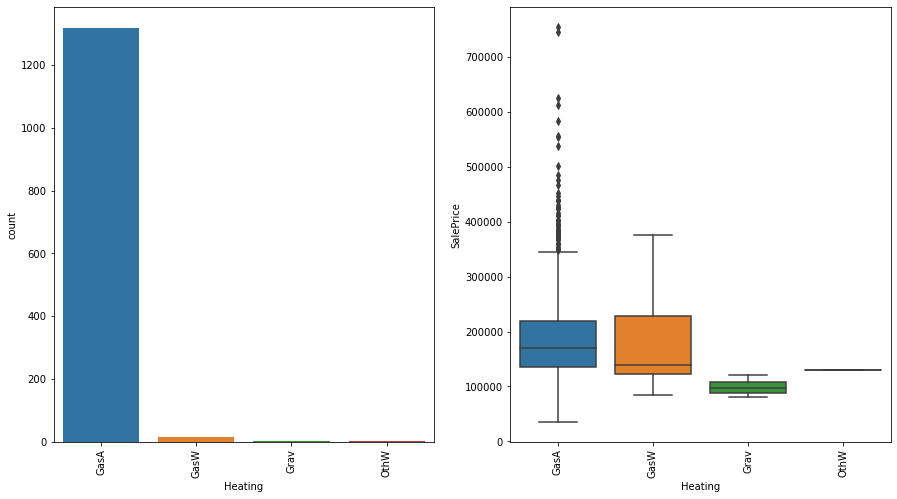

In [104]:
cat_graph(data,'Heating')

In [105]:
data['Heating'].value_counts(normalize=True)

GasA    0.985063
GasW    0.011949
Grav    0.002240
OthW    0.000747
Name: Heating, dtype: float64

- Arounf 97% uses `Gas forced warm air furnace`.  Data skewed we can delete the column. It doses add any information to the model.

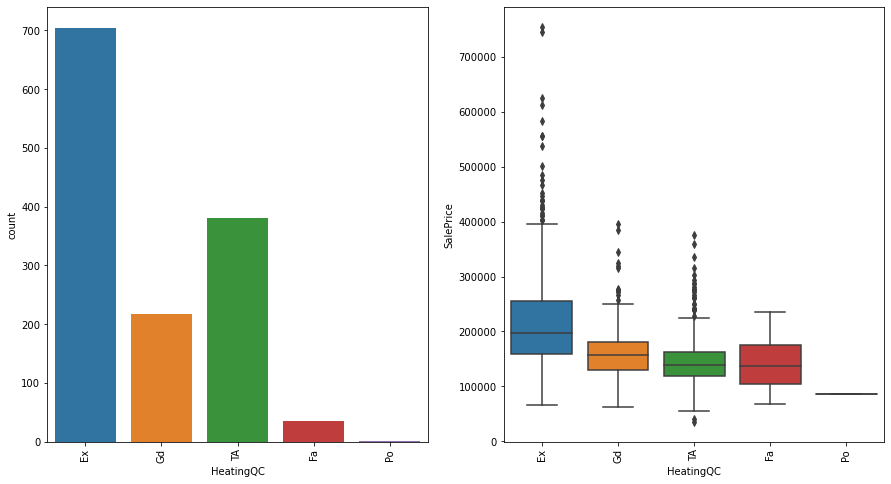

In [106]:
cat_graph(data,'HeatingQC')

- Houses with Excellent Quality of heating condititon have high Price

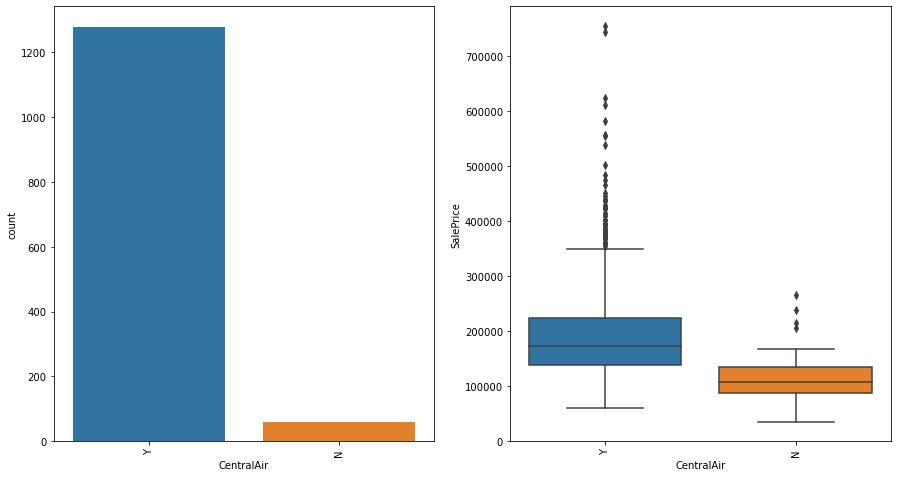

In [107]:
cat_graph(data,'CentralAir')

In [108]:
data['CentralAir'].value_counts(normalize=1)

Y    0.954444
N    0.045556
Name: CentralAir, dtype: float64

- Houses which are `Central Air ` are High in Price

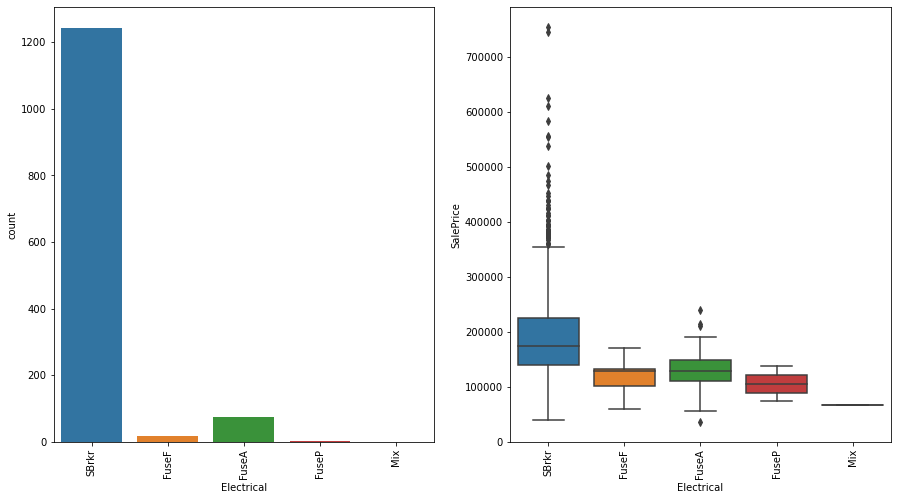

In [109]:
cat_graph(data,'Electrical')

In [110]:
data['Electrical'].value_counts(normalize=True)

SBrkr    0.928305
FuseA    0.056759
FuseF    0.012696
FuseP    0.001494
Mix      0.000747
Name: Electrical, dtype: float64

- Houses with `Standard Circuit Breakers & Romex` has high in Price

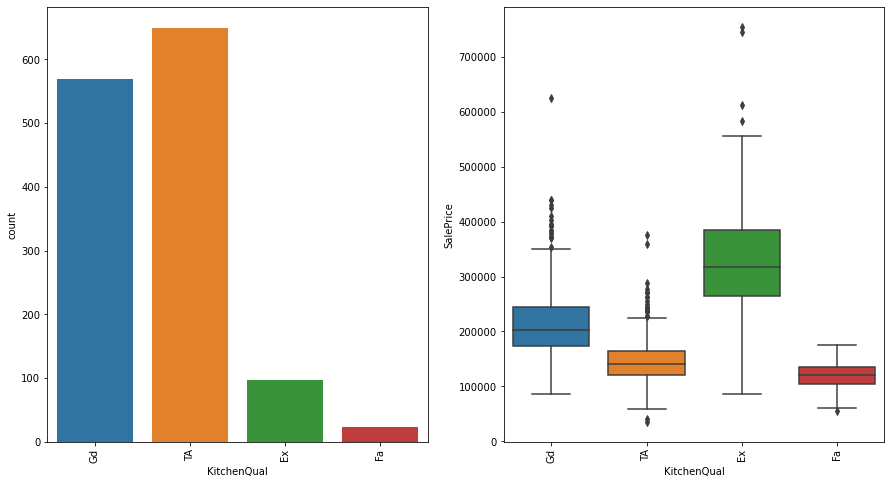

In [111]:
cat_graph(data,'KitchenQual')

- Houses which has excellent kitchen qualtiy has higher in Price

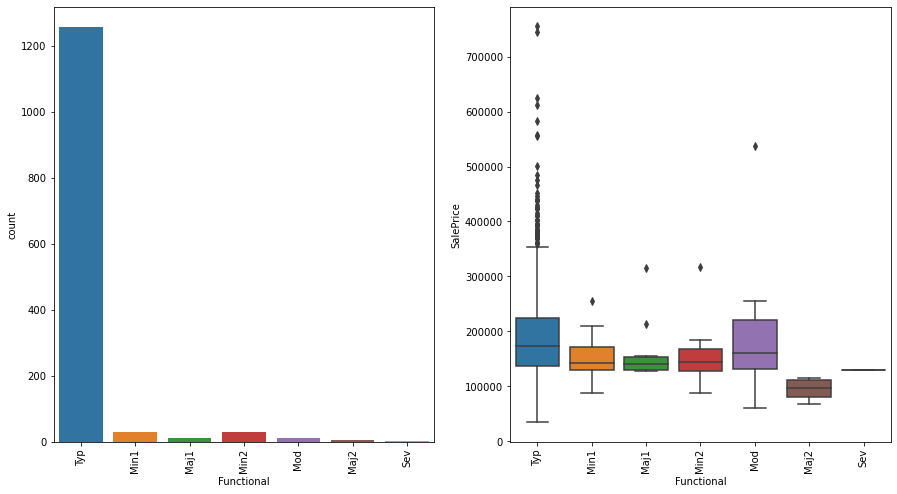

In [112]:
cat_graph(data,'Functional')

In [113]:
data['Functional'].value_counts(normalize=True)

Typ     0.937267
Min2    0.022405
Min1    0.020911
Mod     0.008215
Maj1    0.007468
Maj2    0.002987
Sev     0.000747
Name: Functional, dtype: float64

- Houses with `Typical Functionality` are Higher in Price

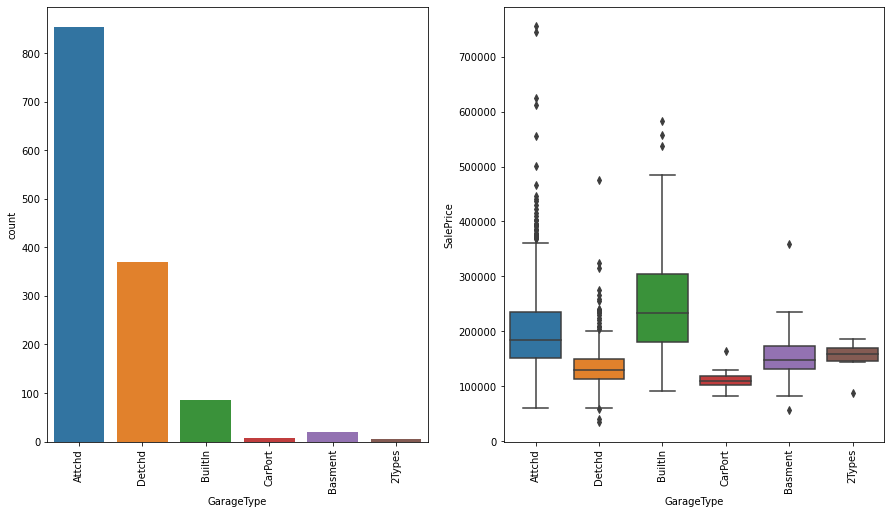

In [114]:
cat_graph(data,'GarageType')

- Houses which are `Built-In (Garage part of house - typically has room above garage)` are Higher in Price

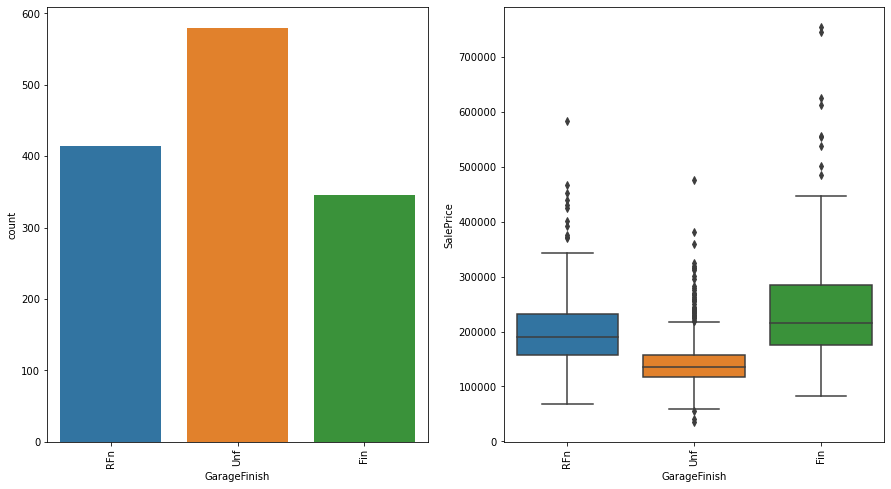

In [115]:
cat_graph(data,'GarageFinish')

- Houses which are finsihed have Higher Price

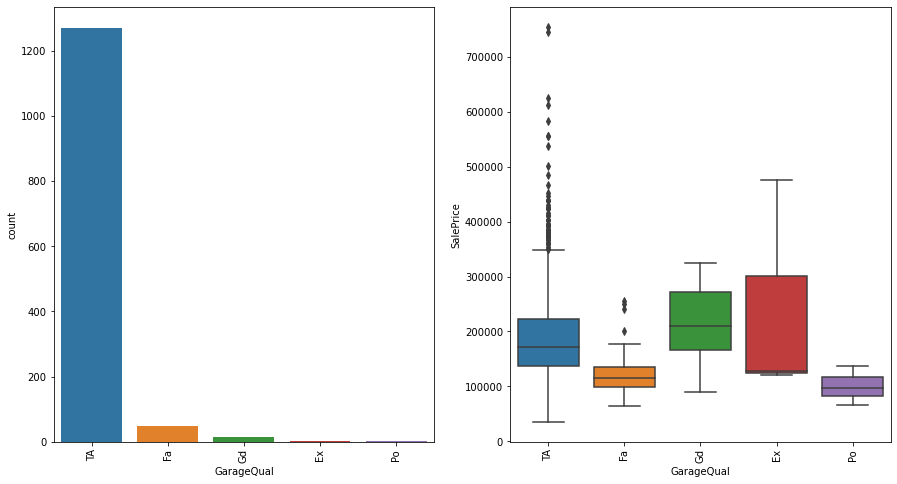

In [116]:
cat_graph(data,'GarageQual')

In [117]:
data['GarageQual'].value_counts(normalize=1)

TA    0.949216
Fa    0.035848
Gd    0.010456
Po    0.002240
Ex    0.002240
Name: GarageQual, dtype: float64

- Houses Which are in Good Quality are Higher in price

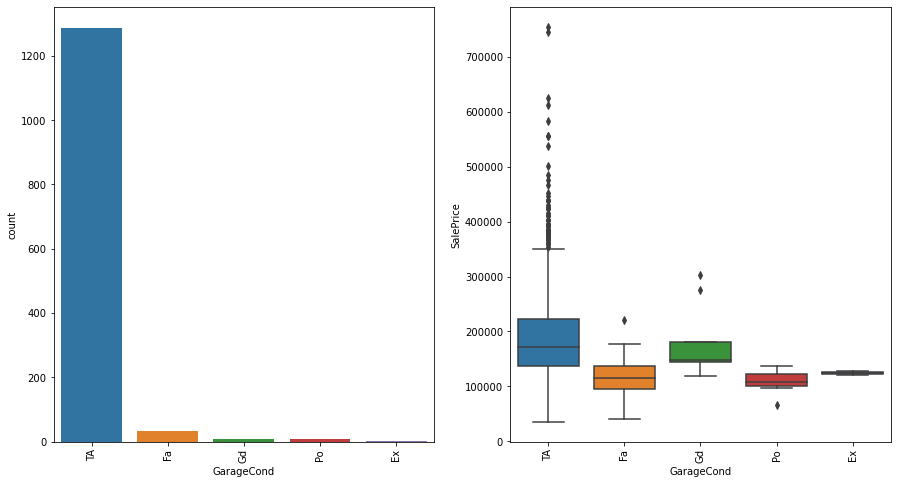

In [118]:
cat_graph(data,'GarageCond')

In [119]:
data['GarageCond'].value_counts(normalize=1)

TA    0.961912
Fa    0.024645
Gd    0.006721
Po    0.005228
Ex    0.001494
Name: GarageCond, dtype: float64

- Houses Which are in Good conditon are Higher in price

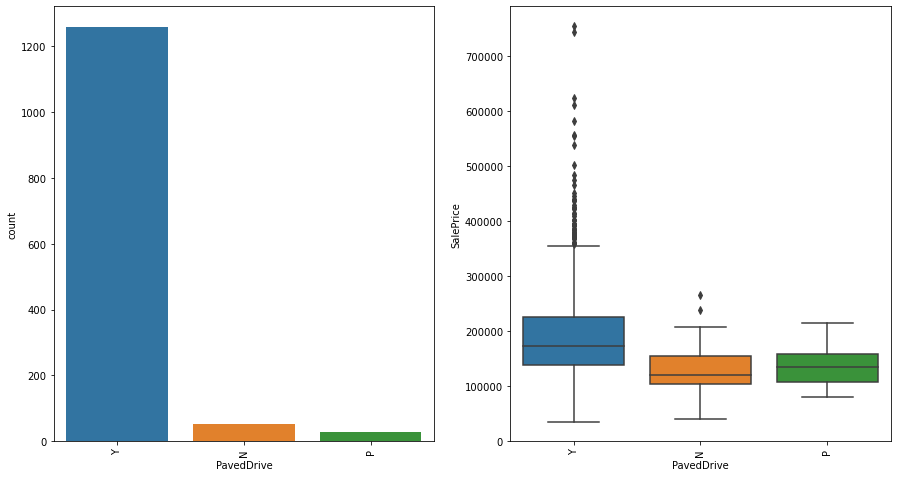

In [120]:
cat_graph(data,'PavedDrive')

In [121]:
data['PavedDrive'].value_counts(normalize=1)

Y    0.939507
N    0.040329
P    0.020164
Name: PavedDrive, dtype: float64

- Houses which have `PavedDrive` are Hihger in Price

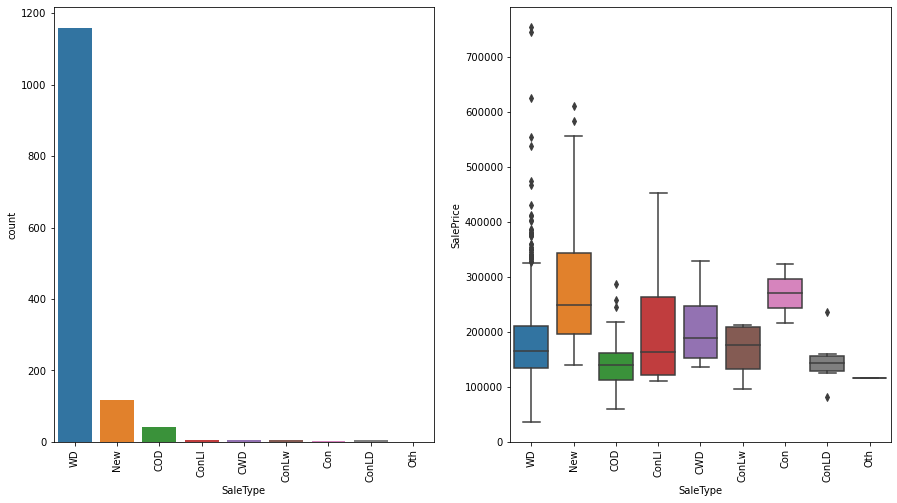

In [122]:
cat_graph(data,'SaleType')

In [123]:
data['SaleType'].value_counts(normalize=1)

WD       0.865571
New      0.087379
COD      0.031367
ConLD    0.004481
CWD      0.002987
ConLI    0.002987
ConLw    0.002987
Con      0.001494
Oth      0.000747
Name: SaleType, dtype: float64

- Houses which are `Home just constructed and sold and Contract 15% Down payment regular terms` are high in Price

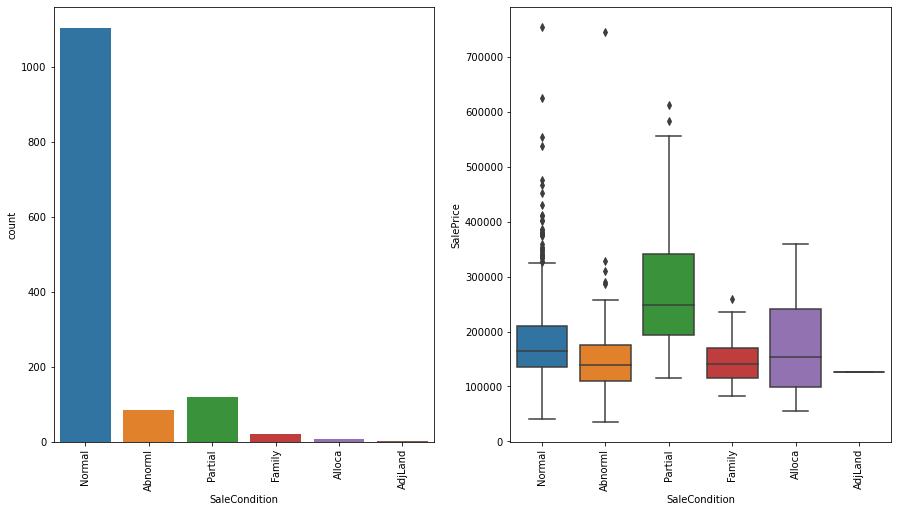

In [124]:
cat_graph(data,'SaleCondition')


-  `Home was not completed when last assessed (associated with New Homes)` are high in Price

##  Numerical Column Analysis

In [125]:
def num_graph(data,col):
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    sns.distplot(data[col])
    plt.xticks(rotation=90)
    plt.subplot(1,2,2)
    sns.scatterplot(data=data,x=col,y='SalePrice')
    plt.xticks(rotation=90)
    plt.show()

## Continuous Variable

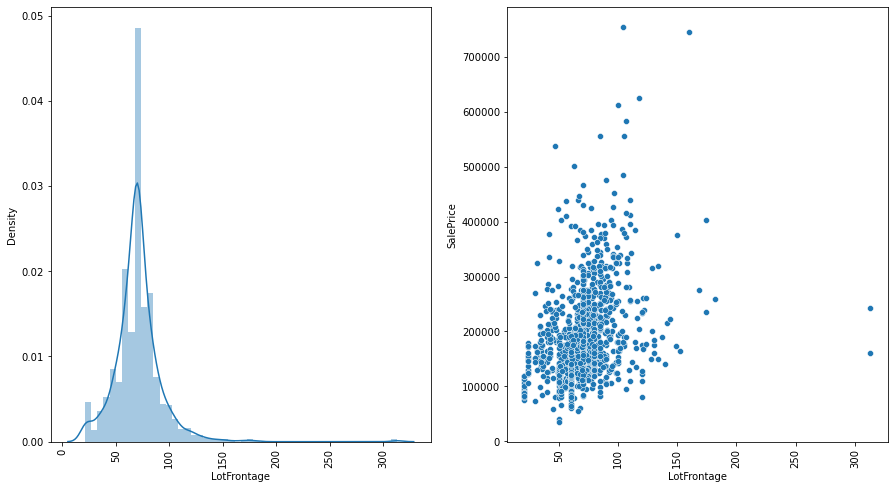

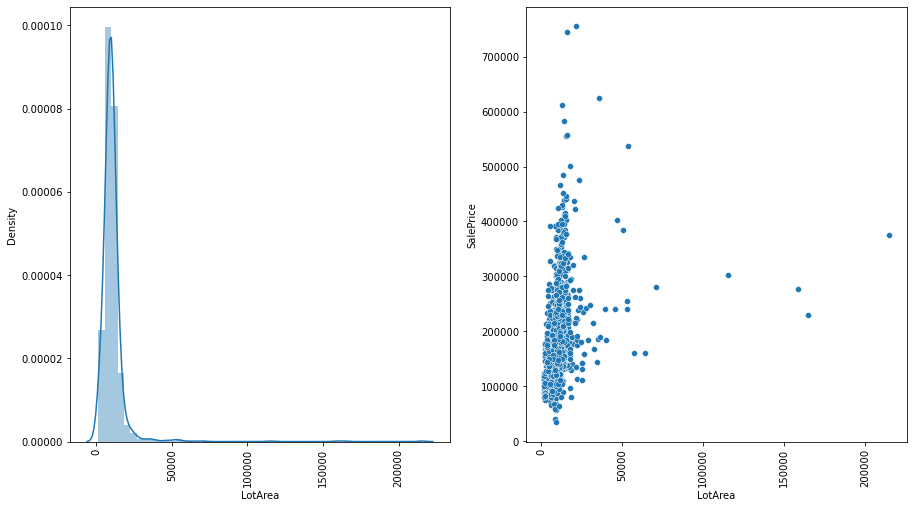

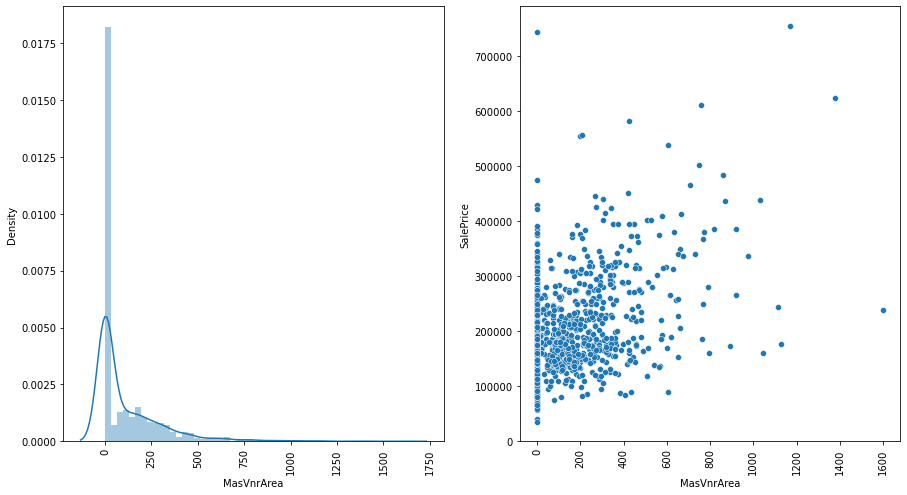

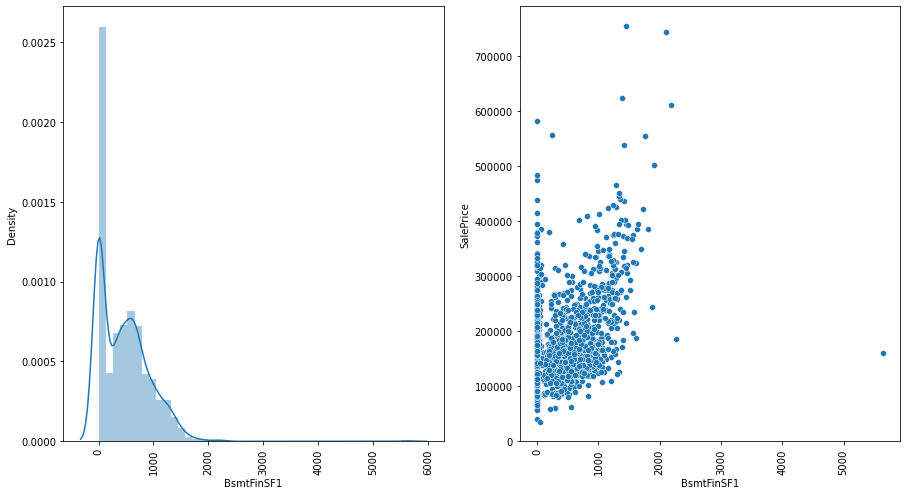

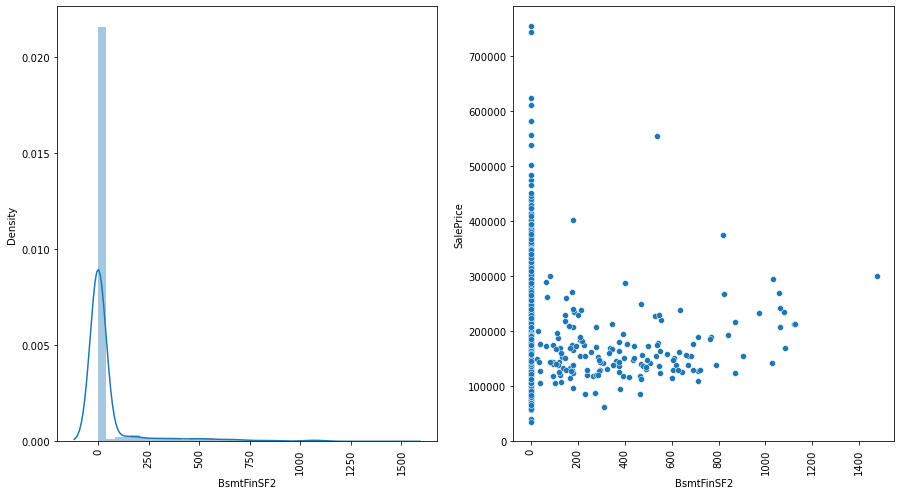

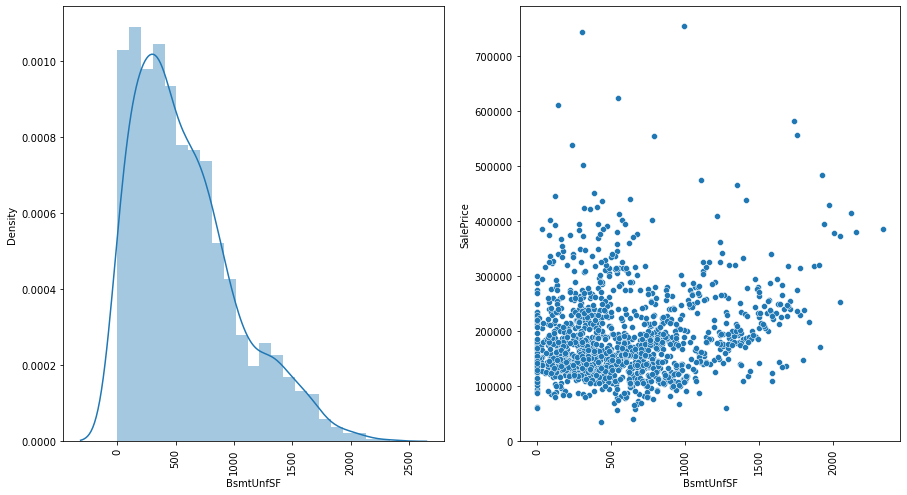

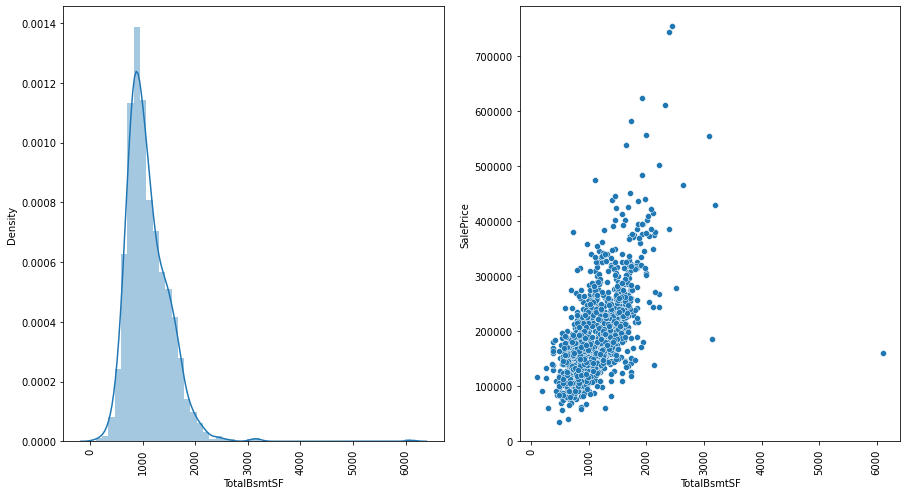

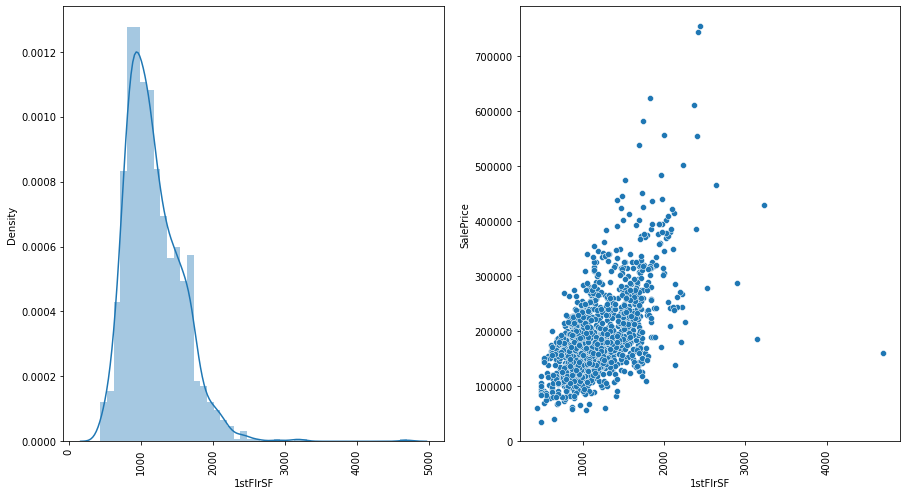

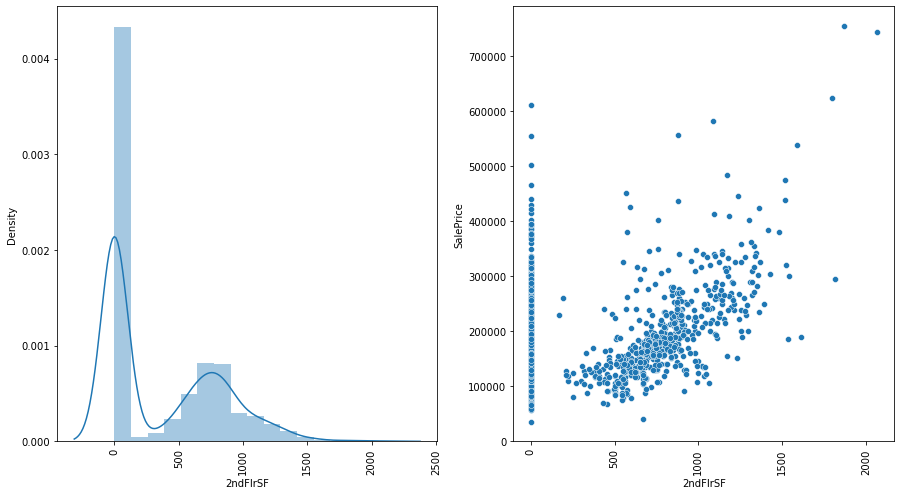

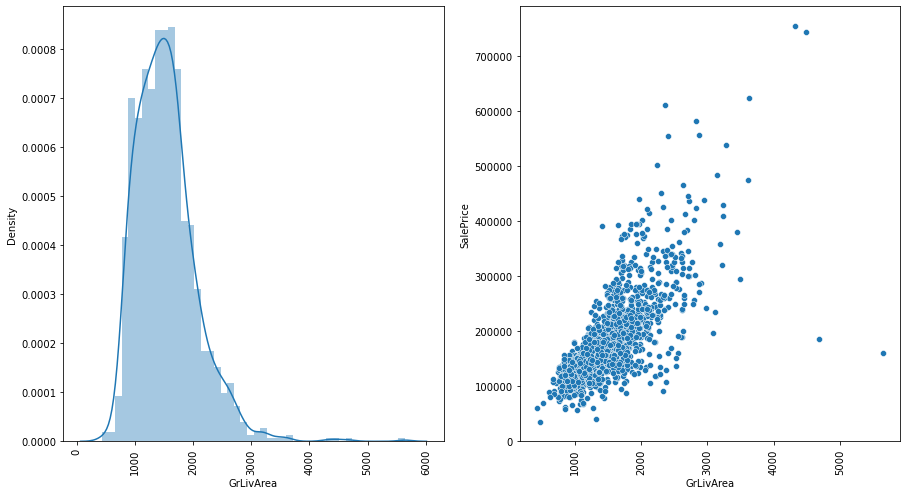

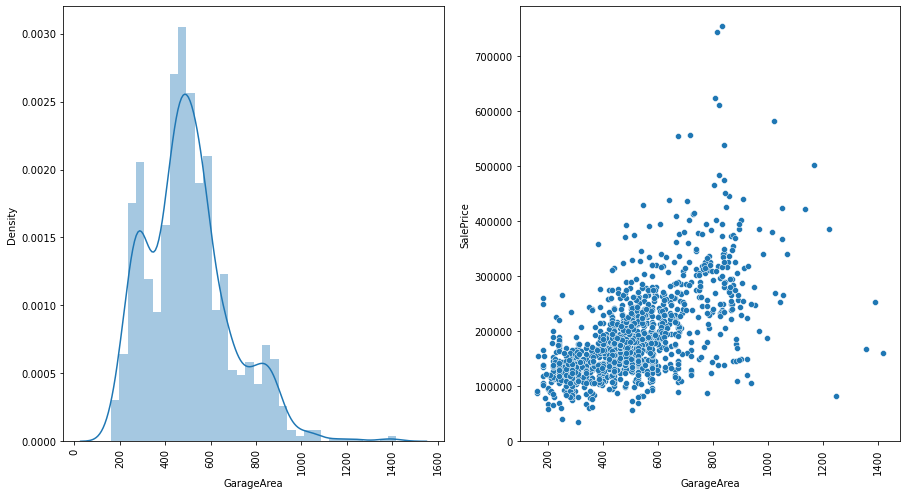

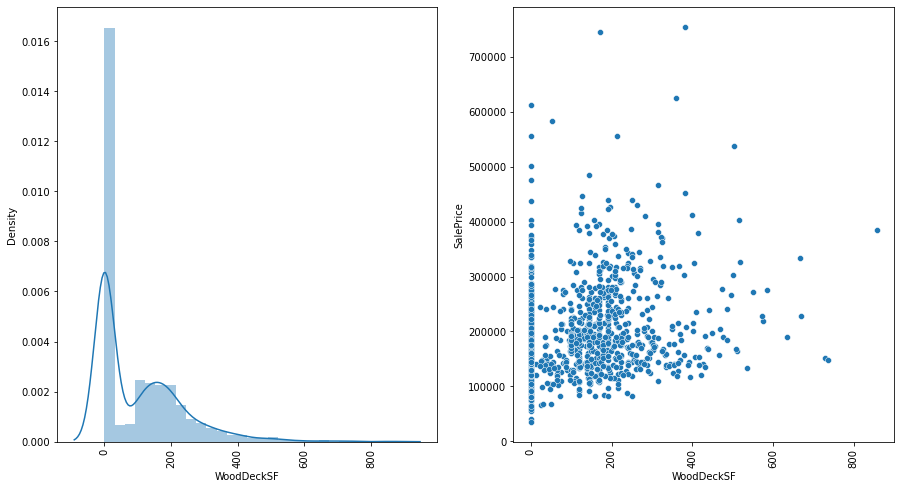

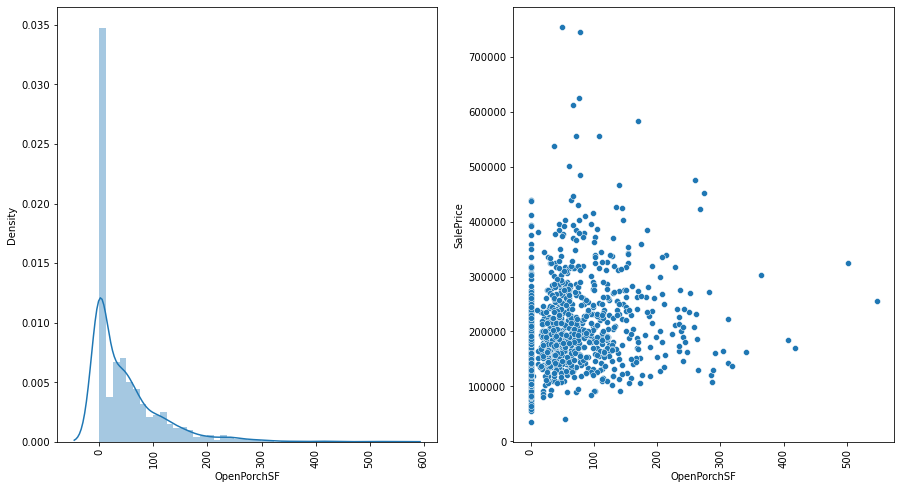

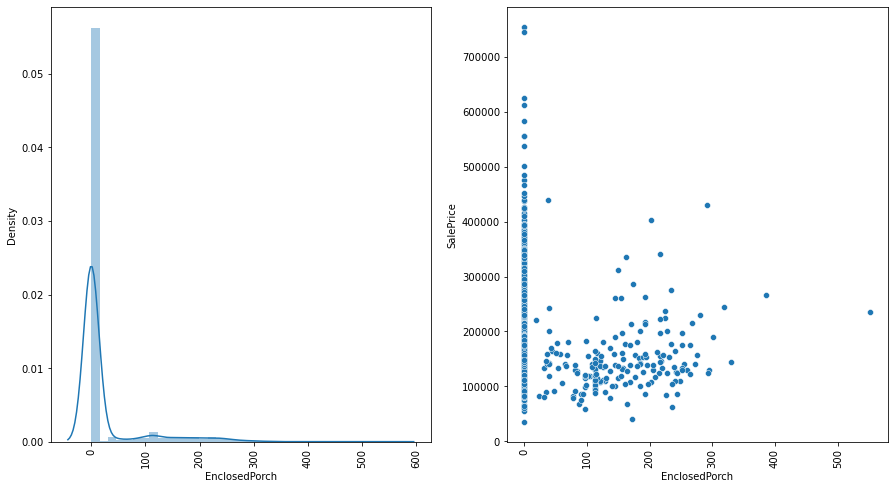

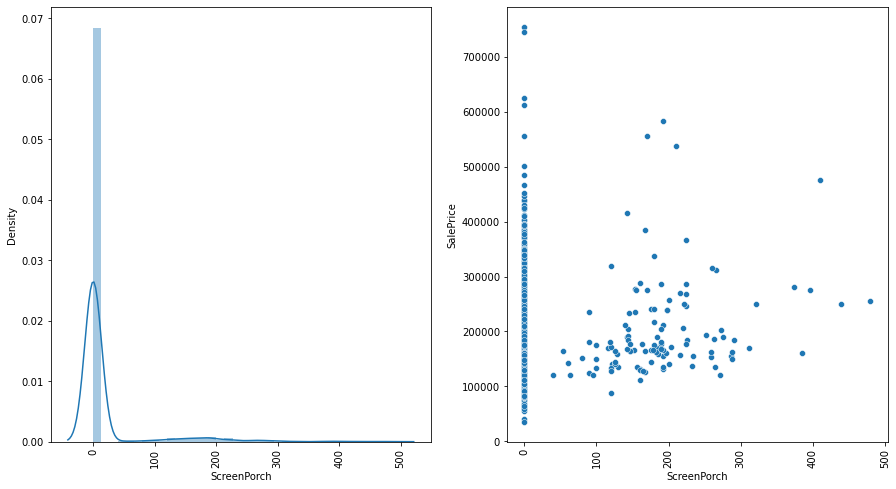

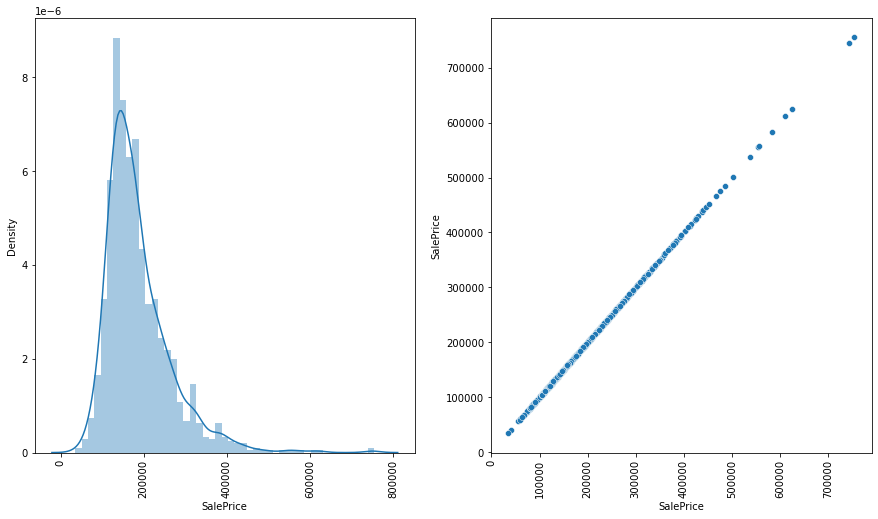

In [126]:
continuous_var=['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']
for i in continuous_var:
    num_graph(data,i)

- All the Independent Column have are linearly related with Dependent Variable(SalePrice) So we use the log transformation for that.

In [127]:
continuous_var

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 'ScreenPorch',
 'SalePrice']

In [128]:
for i in continuous_var:
    data[i]=np.log(data[i]+1)


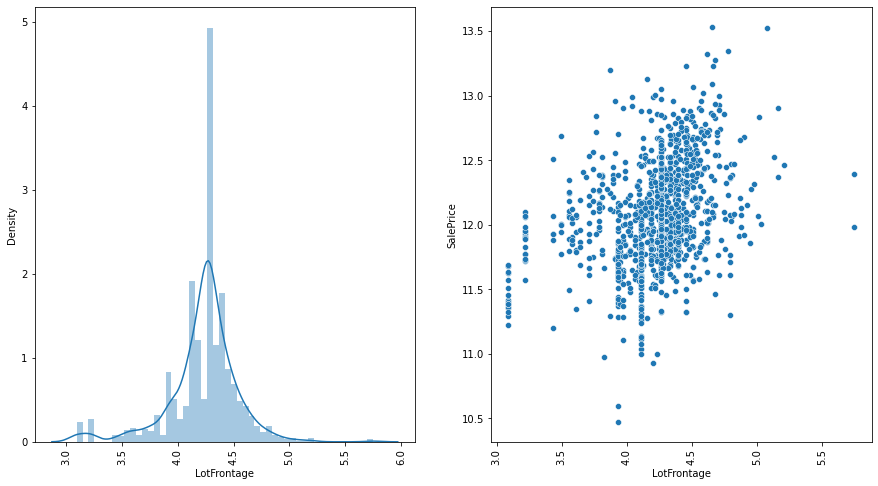

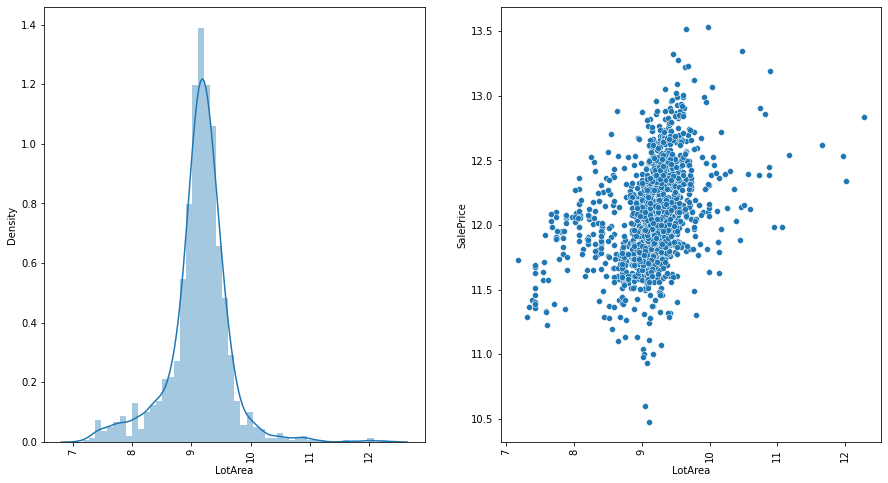

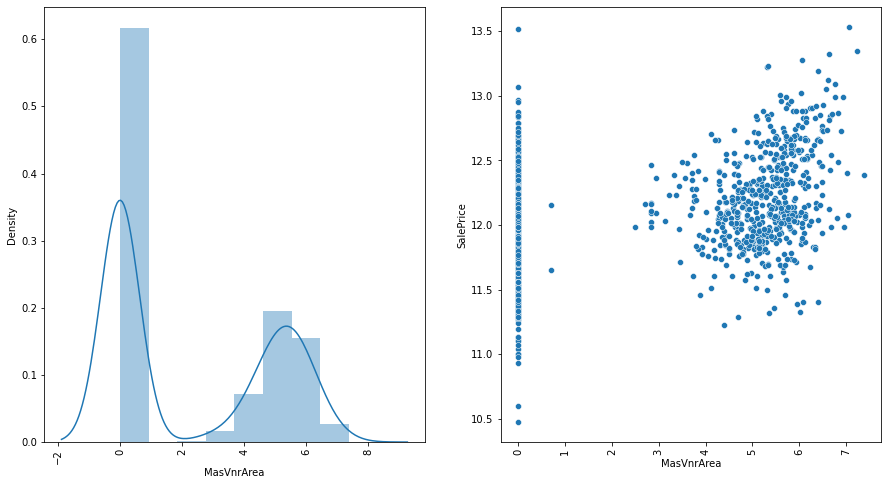

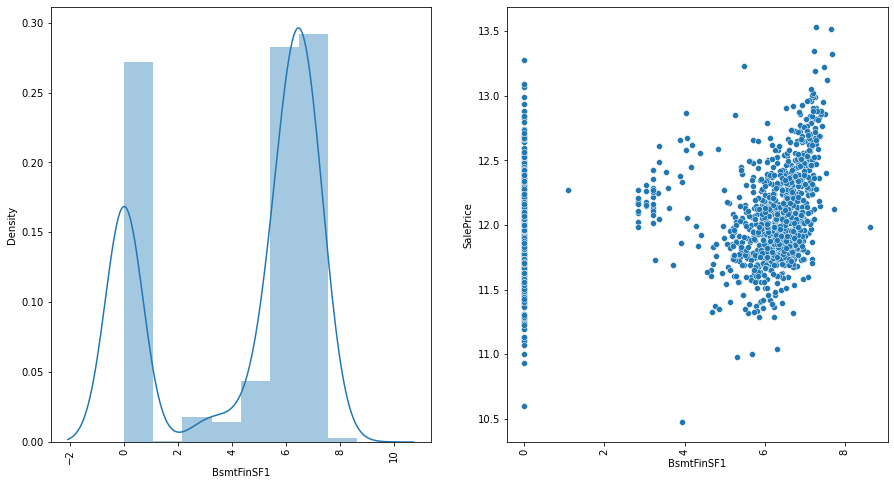

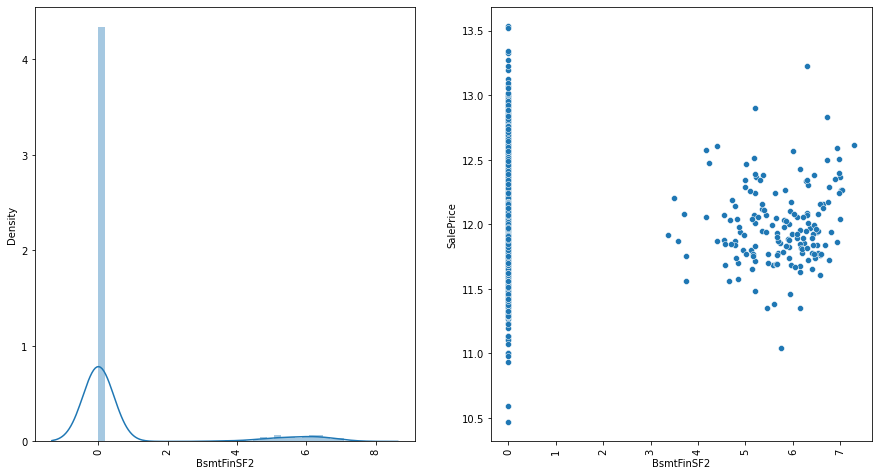

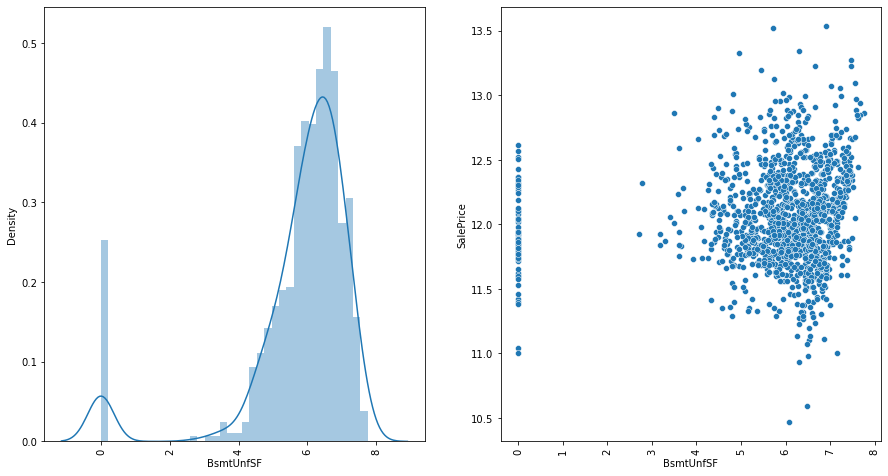

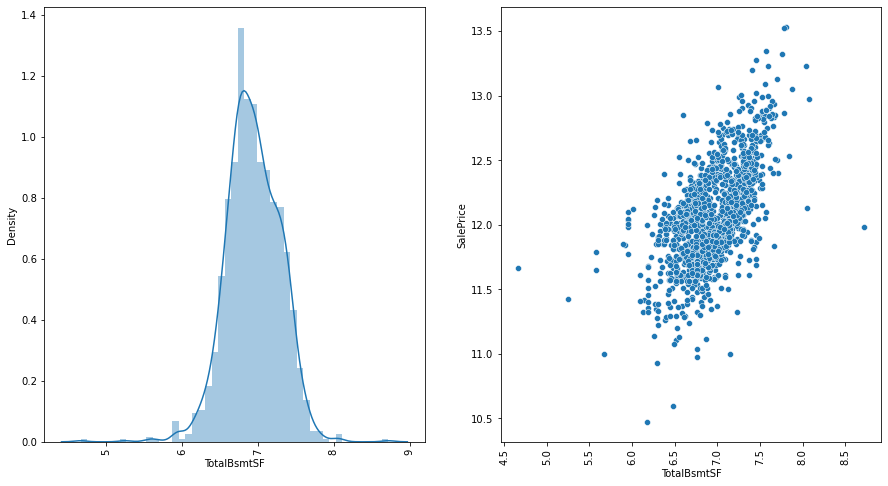

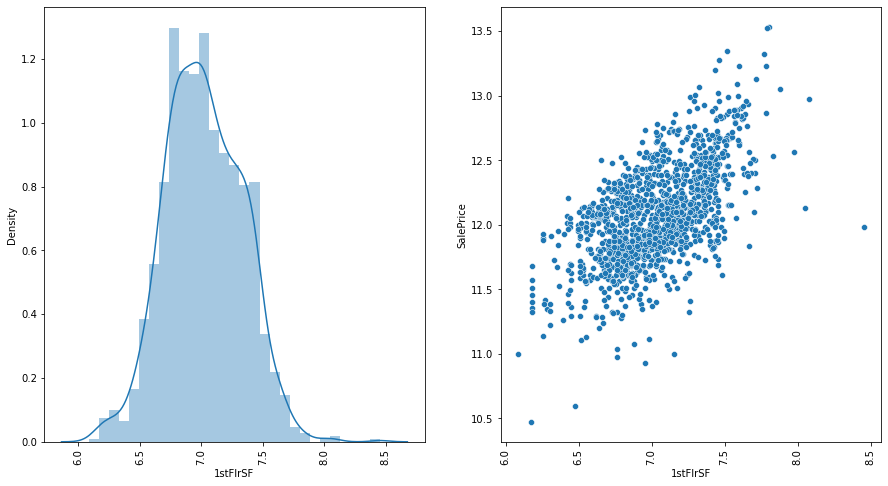

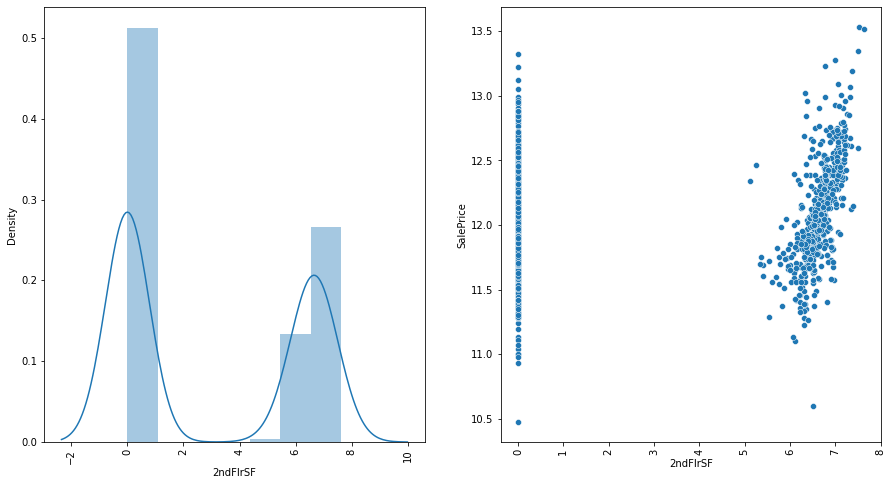

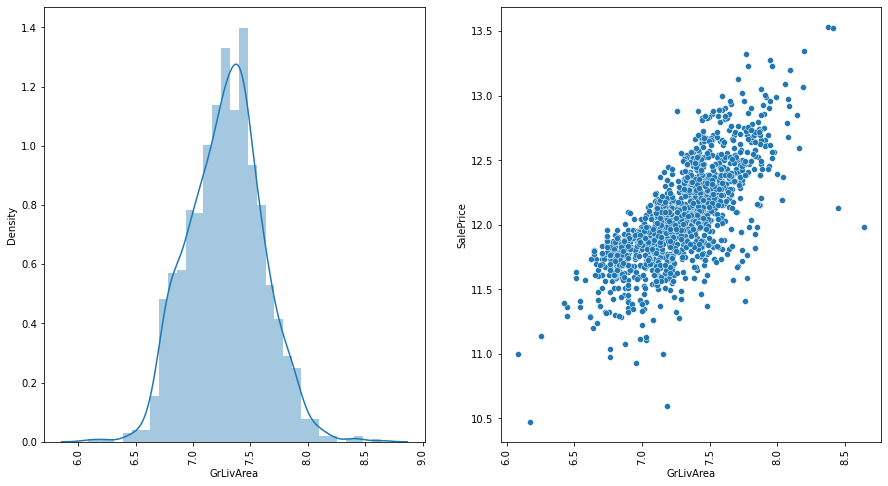

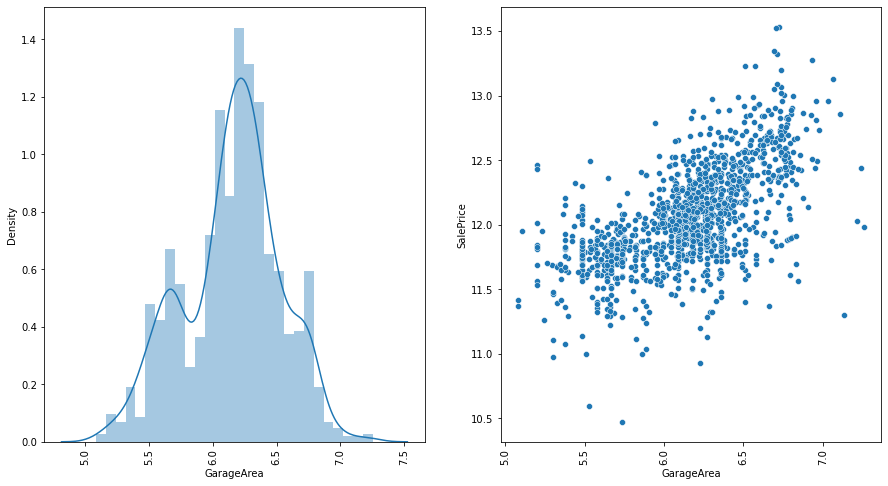

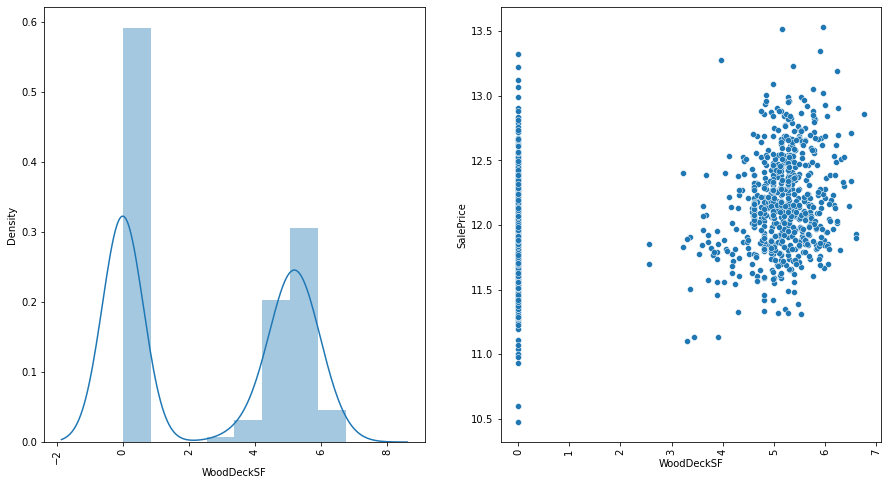

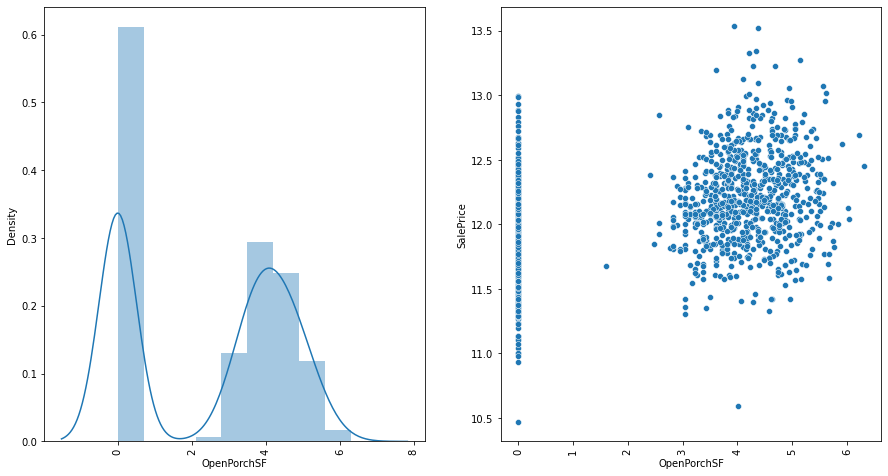

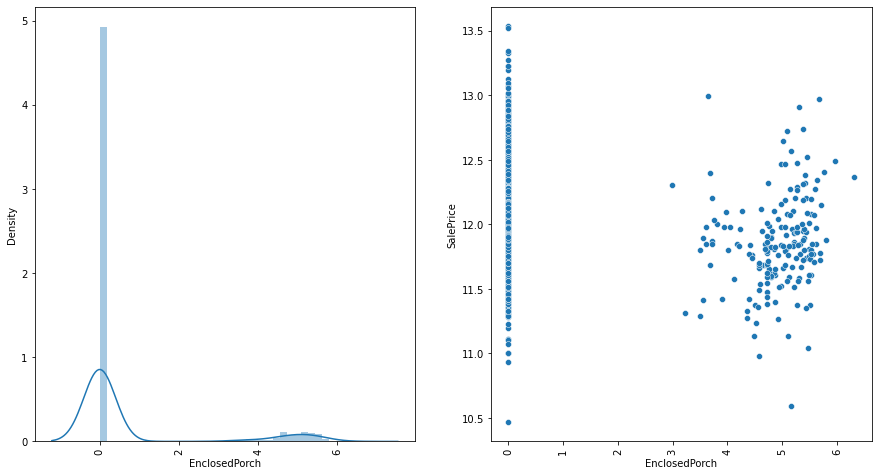

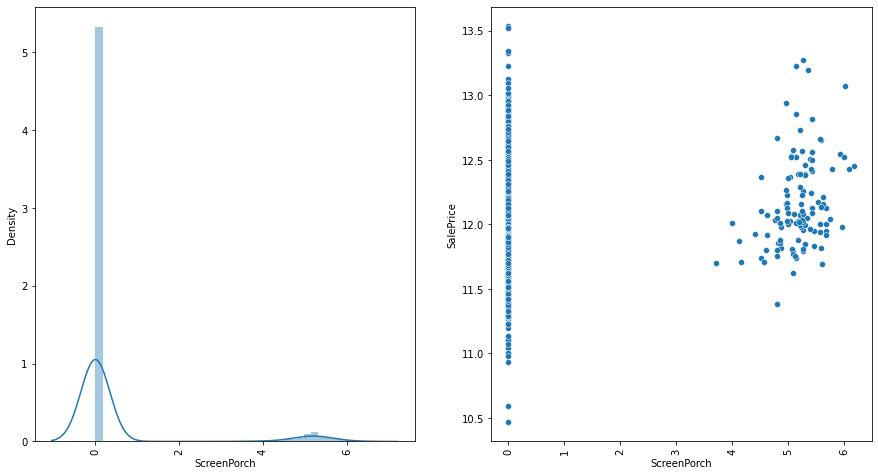

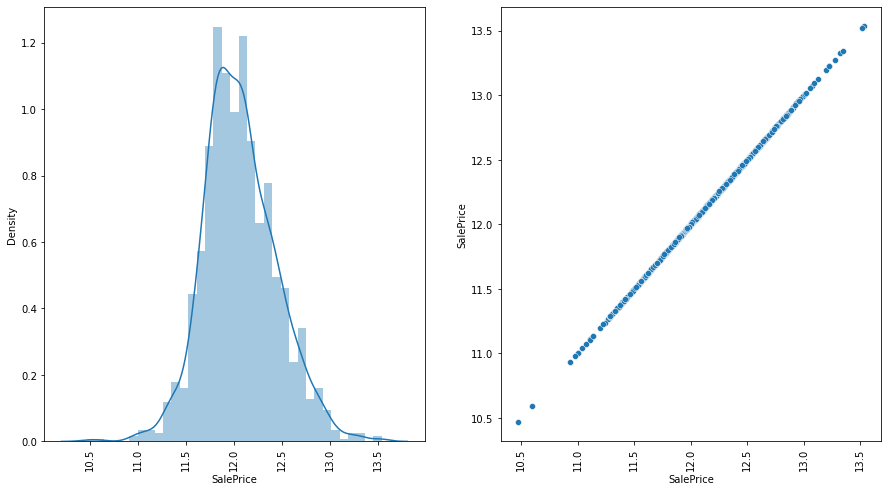

In [129]:
for i in continuous_var:
    num_graph(data,i)
  

- Now All the columns some relationship with dependent variable

##  Outlier Detection

In [130]:
def outliter_dection(data,i):
    plt.figure(figsize=(15,8))
    plt.subplot(1,2,1)
    sns.boxplot(y=data[i])
    plt.subplot(1,2,2)
    sns.scatterplot(data=data,y='SalePrice',x=i)
    plt.show()

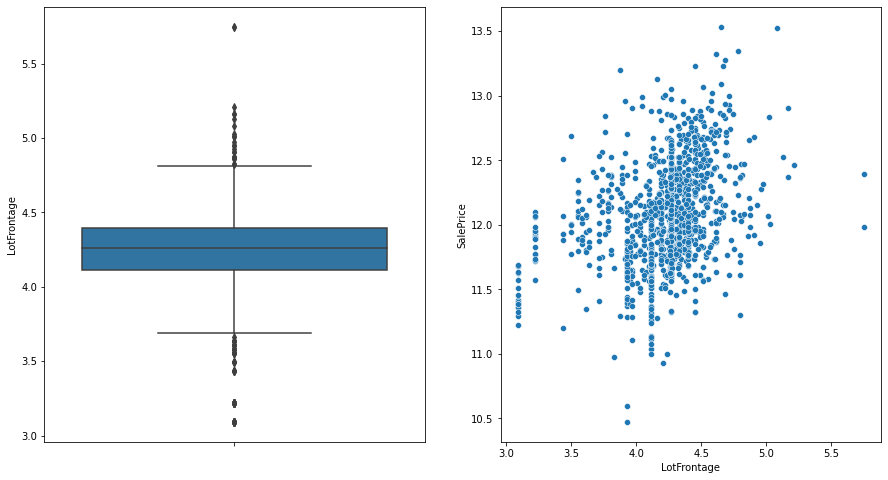

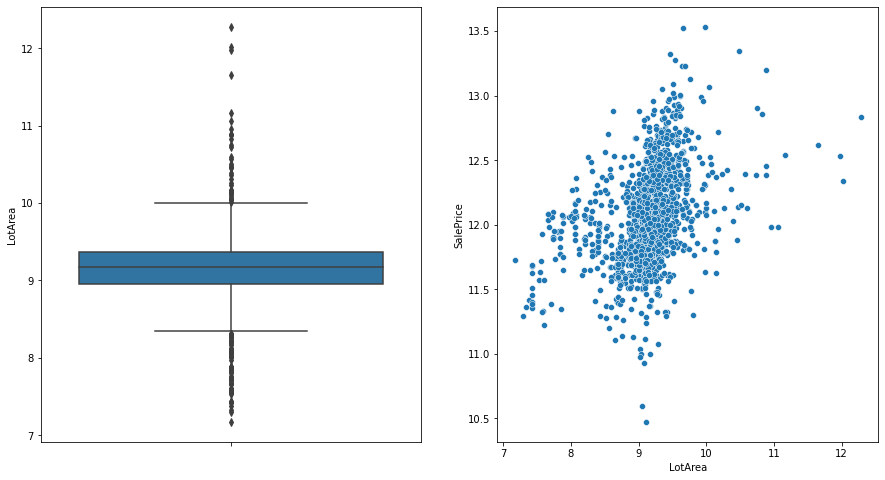

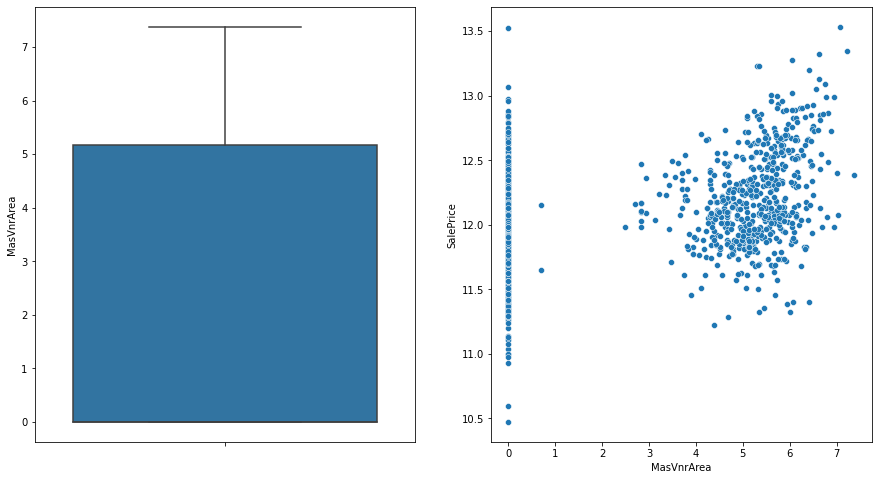

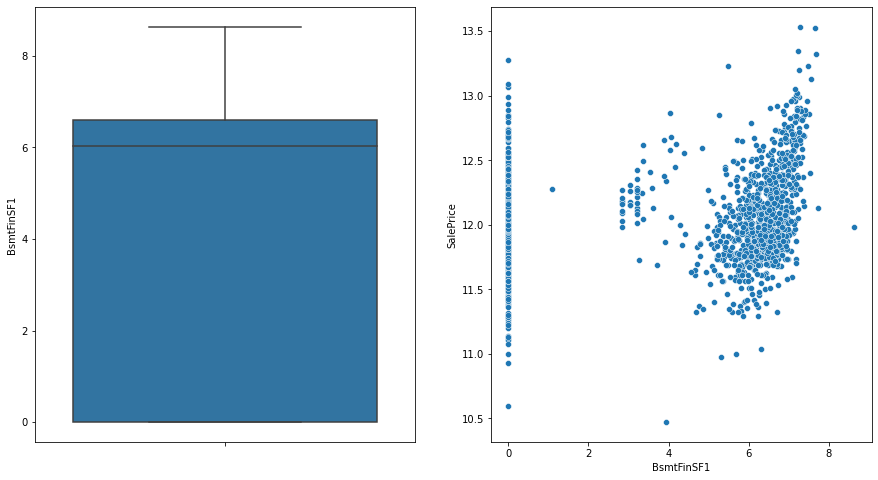

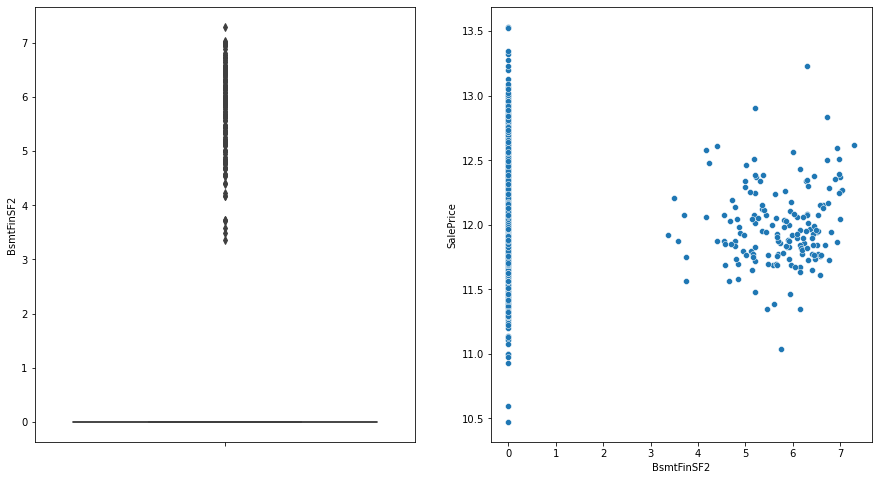

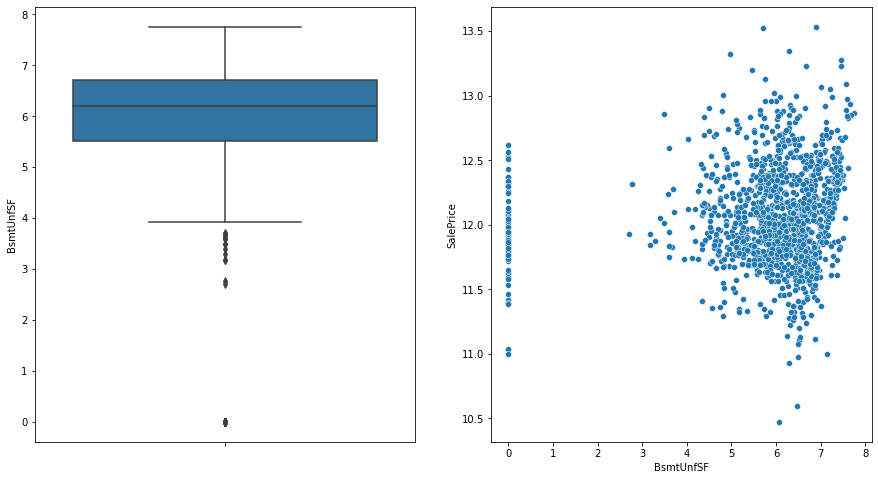

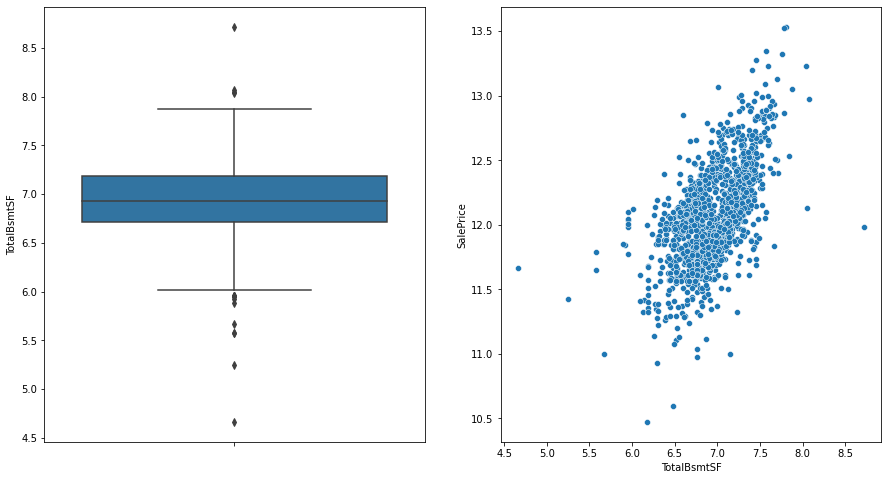

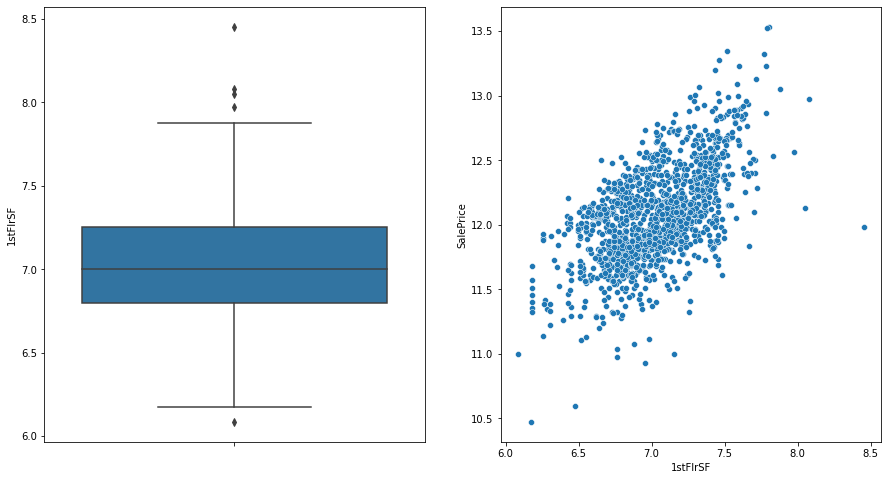

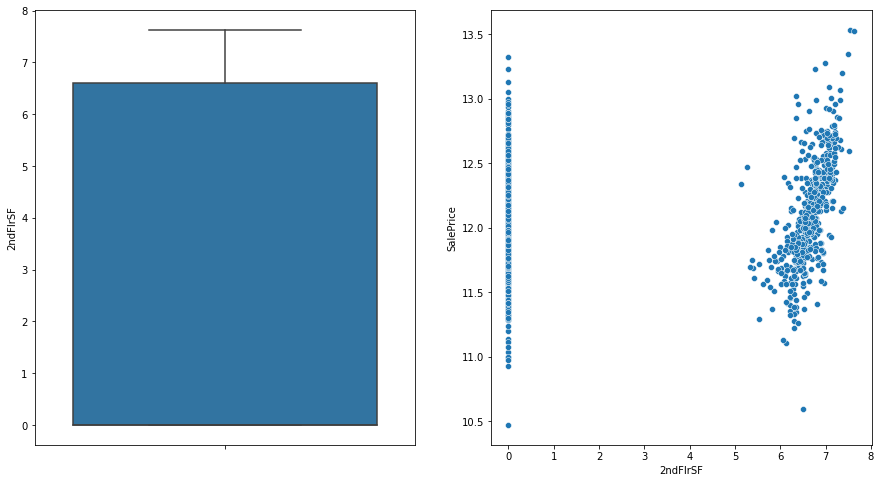

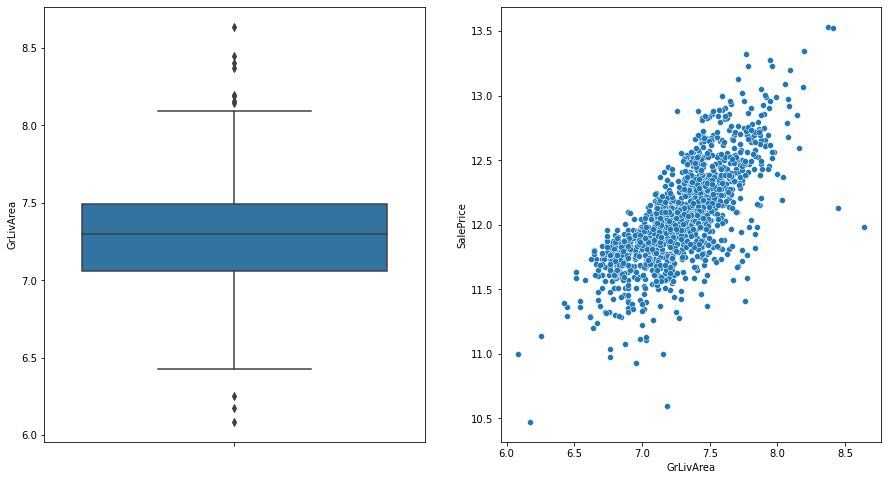

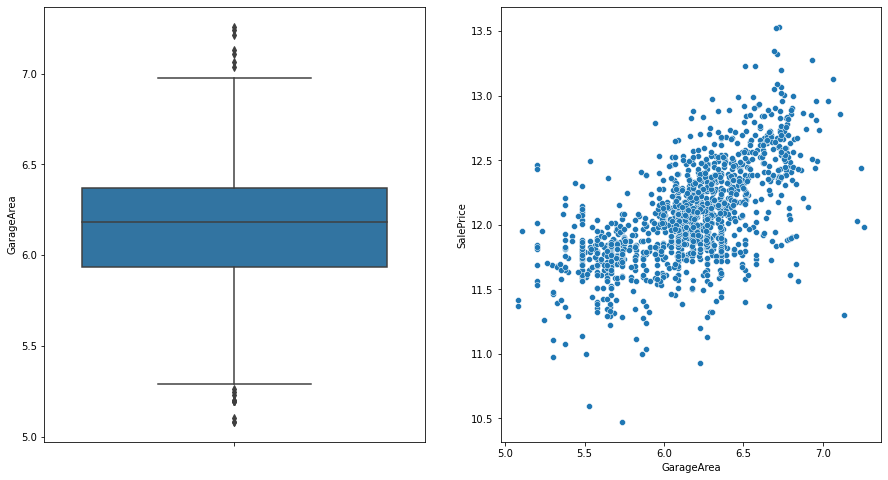

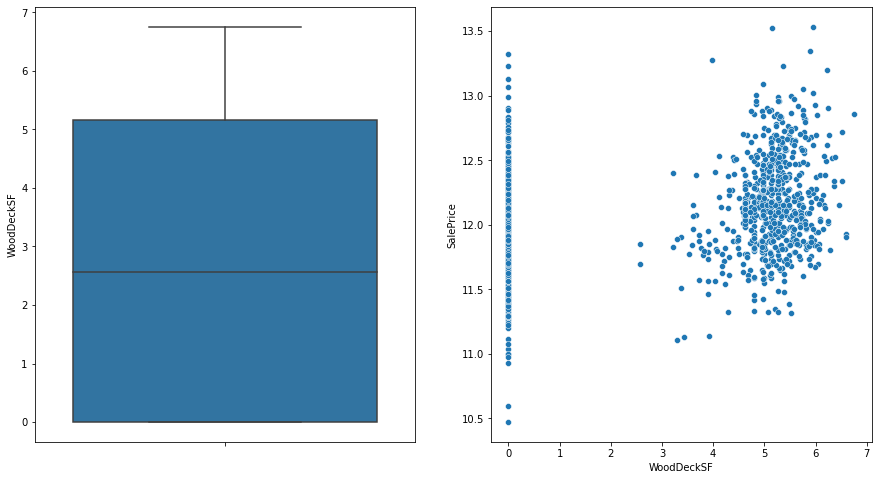

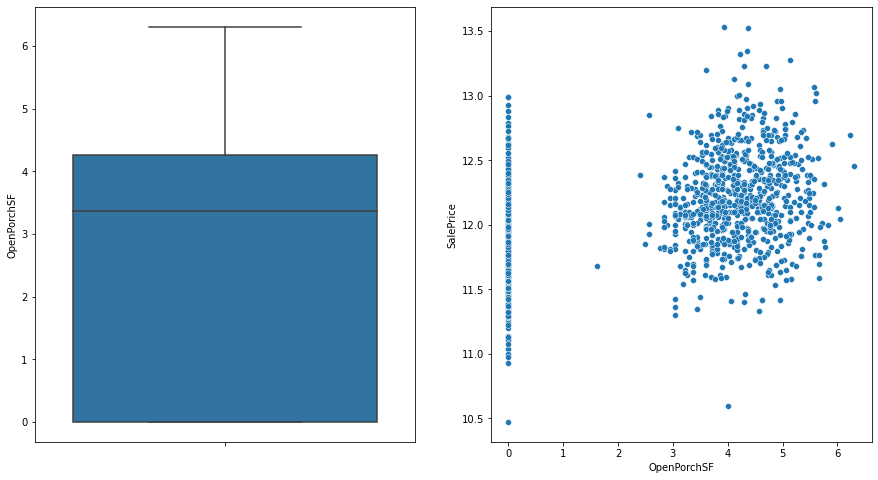

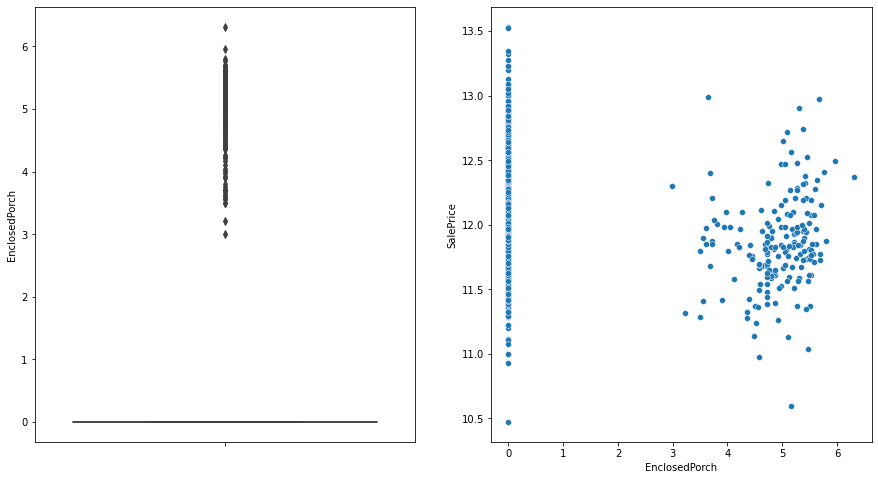

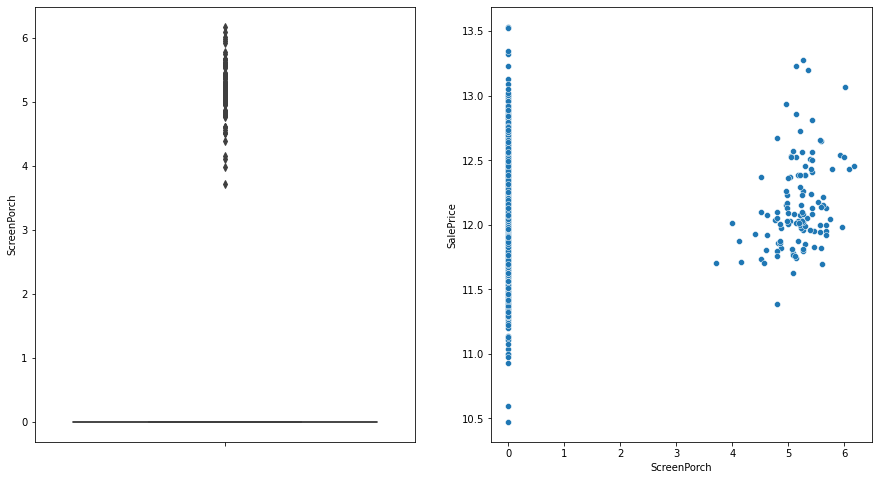

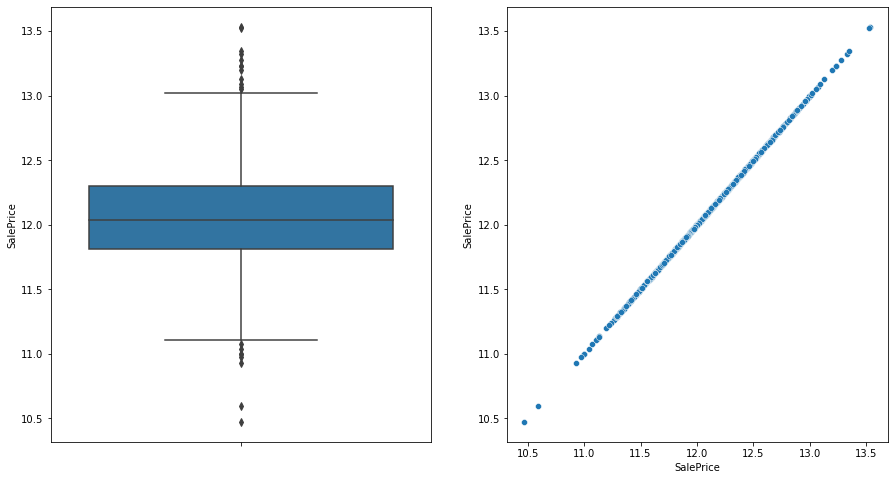

In [131]:
for i in continuous_var:
    outliter_dection(data,i)


In [132]:

import plotly.express as px
fg=px.imshow(data[numerical_col].corr().abs(),text_auto=True,aspect="auto", width=1500,height=1000)
fg.show()

In [133]:
data.drop('Id',1,inplace=True)
def corrFilter(data, bound):
    xCorr = data.corr()
    xFiltered = xCorr[((xCorr >= bound) | (xCorr <= -bound)) & (xCorr !=1.000)]
    xFlattened = xFiltered.unstack().sort_values().drop_duplicates()
    return xFlattened

In [134]:
pd.DataFrame(corrFilter(data, .7))

0
GrLivArea   SalePrice     0.729053
OverallQual SalePrice     0.807480
GrLivArea   TotRmsAbvGrd  0.824119
YearBuilt   GarageYrBlt   0.825293
TotalBsmtSF 1stFlrSF      0.844140
GarageCars  GarageArea    0.849461
MSSubClass  MSSubClass         NaN

In [135]:
k=data[['SalePrice','TotRmsAbvGrd','GarageYrBlt','1stFlrSF','GarageArea','GarageCars','TotalBsmtSF','YearBuilt','GrLivArea','OverallQual','GrLivArea']]

In [136]:
fg=px.imshow(k.corr(),text_auto=True,aspect="auto", width=700,height=500)
fg.show()

# Data Preparation

In [137]:
drop=['Fence', 'FireplaceQu', 'MiscFeature', 'PoolQC', 'Alley']
col=[]
for i in categorical_col:
    if i  not in drop:
        col.append(i)
col       

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [138]:
label=LabelEncoder()
for i in col:
    data[i]=label.fit_transform(data[i])

In [139]:
data.isna().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

### Train Test Split

In [140]:
X_train,X_test=train_test_split(data,train_size=.70,random_state=100)

In [141]:
print(X_train.shape)
print(X_test.shape)


(937, 75)
(402, 75)


In [142]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 937 entries, 1431 to 861
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     937 non-null    int64  
 1   MSZoning       937 non-null    int32  
 2   LotFrontage    937 non-null    float64
 3   LotArea        937 non-null    float64
 4   Street         937 non-null    int32  
 5   LotShape       937 non-null    int32  
 6   LandContour    937 non-null    int32  
 7   Utilities      937 non-null    int32  
 8   LotConfig      937 non-null    int32  
 9   LandSlope      937 non-null    int32  
 10  Neighborhood   937 non-null    int32  
 11  Condition1     937 non-null    int32  
 12  Condition2     937 non-null    int32  
 13  BldgType       937 non-null    int32  
 14  HouseStyle     937 non-null    int32  
 15  OverallQual    937 non-null    int64  
 16  OverallCond    937 non-null    int64  
 17  YearBuilt      937 non-null    int64  
 18  YearRem

In [143]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 402 entries, 12 to 1441
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     402 non-null    int64  
 1   MSZoning       402 non-null    int32  
 2   LotFrontage    402 non-null    float64
 3   LotArea        402 non-null    float64
 4   Street         402 non-null    int32  
 5   LotShape       402 non-null    int32  
 6   LandContour    402 non-null    int32  
 7   Utilities      402 non-null    int32  
 8   LotConfig      402 non-null    int32  
 9   LandSlope      402 non-null    int32  
 10  Neighborhood   402 non-null    int32  
 11  Condition1     402 non-null    int32  
 12  Condition2     402 non-null    int32  
 13  BldgType       402 non-null    int32  
 14  HouseStyle     402 non-null    int32  
 15  OverallQual    402 non-null    int64  
 16  OverallCond    402 non-null    int64  
 17  YearBuilt      402 non-null    int64  
 18  YearRemo

### Feature Scaling 

In [144]:
numerical_col=['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold']

In [145]:
scaler=StandardScaler()
X_train[numerical_col]=scaler.fit_transform(X_train[numerical_col])
X_test[numerical_col]=scaler.transform(X_test[numerical_col])

In [146]:
X_train.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
1431    1.568878         3     0.118624 -1.247375       1         0   
571    -0.865364         3    -0.379410 -0.456112       1         3   
173    -0.865364         3     0.546632  0.200817       1         0   
732     0.108333         3     0.338562  0.423627       1         0   
1282   -0.865364         3    -0.326310 -0.092636       1         0   

      LandContour  Utilities  LotConfig  LandSlope  ...  EnclosedPorch  \
1431            3          0          4          0  ...      -0.389072   
571             3          0          4          0  ...      -0.389072   
173             3          0          4          0  ...      -0.389072   
732             3          0          4          0  ...      -0.389072   
1282            3          0          4          0  ...      -0.389072   

      3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  \
1431  -0.129268    -0.306644 -0.045969 -0.074022  1.374966  0.896500   
571   -0.129268    -0.306644 -0.045969 -0.074022  1.374966 -1.367706   
173   -0.129268    -0.306644 -0.045969 -0.074022 -0.094487  0.141765   
732   -0.129268    -0.306644 -0.045969 -0.074022  0.272876  0.141765   
1282  -0.129268     3.589934 -0.045969 -0.074022  1.007603  0.896500   

      SaleType  SaleCondition  SalePrice  
1431         8              4  11.875838  
571          8              0  11.695255  
173          0              4  12.001512  
732          8              4  12.312687  
1282         8              4  11.921725  

[5 rows x 75 columns]

In [147]:
X_test.head()

MSSubClass  MSZoning  LotFrontage   LotArea  Street  LotShape  \
12    -0.865364         3     0.118624  0.679601       1         1   
335    3.272848         3     0.118624  5.741568       0         0   
348    2.542575         3    -2.012064 -2.640594       1         3   
885    1.568878         1    -0.964109 -1.171648       1         0   
175   -0.865364         3     0.704040  0.624634       1         3   

     LandContour  Utilities  LotConfig  LandSlope  ...  EnclosedPorch  \
12             3          0          4          0  ...      -0.389072   
335            1          0          0          2  ...      -0.389072   
348            3          0          4          0  ...      -0.389072   
885            3          0          1          0  ...      -0.389072   
175            3          0          0          0  ...       1.814490   

     3SsnPorch  ScreenPorch  PoolArea   MiscVal    MoSold    YrSold  SaleType  \
12   -0.129268     3.252790 -0.045969 -0.074022  1.007603  0.141765         8   
335  -0.129268    -0.306644 -0.045969  1.104852  0.640239  0.141765         8   
348  -0.129268    -0.306644 -0.045969 -0.074022  1.374966  0.141765         8   
885  -0.129268    -0.306644 -0.045969 -0.074022 -1.931304  0.141765         1   
175  -0.129268    -0.306644 -0.045969 -0.074022 -0.094487 -0.612971         8   

     SaleCondition  SalePrice  
12               4  11.877576  
335              4  12.341263  
348              4  11.944714  
885              0  12.703512  
175              4  12.400821  

[5 rows x 75 columns]

In [148]:
### Create X and y
y_train=X_train.pop('SalePrice')
X_train=X_train
y_test=X_test.pop('SalePrice')
X_test=X_test

In [149]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)

(937, 74)
(402, 74)
(402,)


# Model Building 


In [150]:
## creating the object of the Linear Regression
lr=LinearRegression()
lr.fit(X_train,y_train) ## fit the model
## prediction
y_pred=lr.predict(X_train)

In [151]:
y_pred_train = lr.predict(X_train)
y_pred_test = lr.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric.append(mse_test_lr**0.5)

0.9071362716278796
0.8555577246646975
11.56845737108809
9.423836751732669
0.012346272541182594
0.023442379979434498


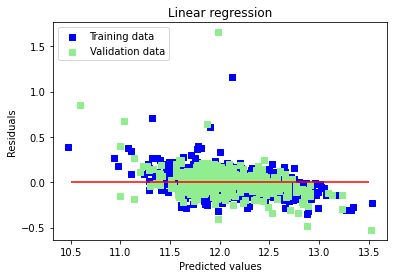

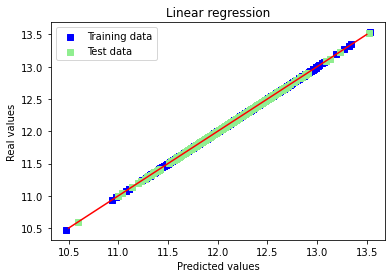

In [152]:
# Plot residuals
plt.scatter(y_train, y_pred_train - y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_pred_test - y_test, c = "lightgreen", marker = "s", label = "Validation data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Residuals")
plt.legend(loc = "upper left")
plt.hlines(y = 0, xmin = 10.5, xmax = 13.5, color = "red")
plt.show()
# Plot predictions
plt.scatter(y_train, y_train, c = "blue", marker = "s", label = "Training data")
plt.scatter(y_test, y_test, c = "lightgreen", marker = "s", label = "Test data")
plt.title("Linear regression")
plt.xlabel("Predicted values")
plt.ylabel("Real values")
plt.legend(loc = "upper left")
plt.plot([10.5, 13.5], [10.5, 13.5], c = "red")
plt.show()

In [153]:
from sklearn.feature_selection import RFECV

In [154]:
lr1=LinearRegression()
rfecv=RFECV(lr1,cv=5,n_jobs=-1,verbose=True,scoring='r2')
rfecv.fit(X_train,y_train)

Fitting estimator with 74 features.
Fitting estimator with 73 features.
Fitting estimator with 72 features.
Fitting estimator with 71 features.
Fitting estimator with 70 features.
Fitting estimator with 69 features.
Fitting estimator with 68 features.
Fitting estimator with 67 features.
Fitting estimator with 66 features.
Fitting estimator with 65 features.
Fitting estimator with 64 features.
Fitting estimator with 63 features.
Fitting estimator with 62 features.
Fitting estimator with 61 features.
Fitting estimator with 60 features.
Fitting estimator with 59 features.
Fitting estimator with 58 features.
Fitting estimator with 57 features.
Fitting estimator with 56 features.
Fitting estimator with 55 features.
Fitting estimator with 54 features.
Fitting estimator with 53 features.
Fitting estimator with 52 features.
Fitting estimator with 51 features.
Fitting estimator with 50 features.
Fitting estimator with 49 features.
Fitting estimator with 48 features.
Fitting estimator with 47 fe

RFECV(cv=5, estimator=LinearRegression(), n_jobs=-1, scoring='r2', verbose=True)

In [155]:
rfecv.n_features_

39

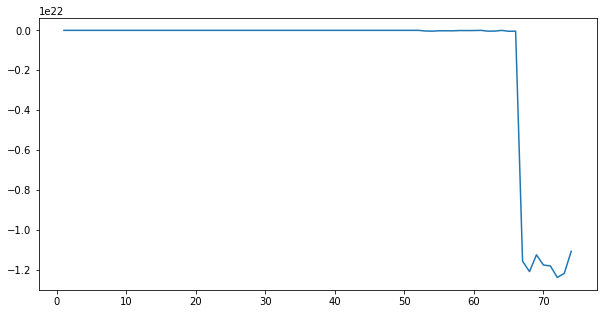

In [156]:
num_features = X_train.shape
num_features[1]

plt.figure(figsize=[10, 5])
plt.plot(range(1, num_features[1]+1), rfecv.grid_scores_)
plt.show()

In [157]:
## columns select by the rfecv
s=X_train.columns[rfecv.support_]
X_train1=X_train[s]
X_test1=X_test[s]

In [158]:
## rebuilding the model and fitting
lr2=LinearRegression()
lr2.fit(X_train1,y_train)

LinearRegression()

In [159]:
## Predicting the value
y_pred=lr2.predict(X_train1)
y_pred_test=lr2.predict(X_test1)

In [160]:
## evaluting on Trainset
r2_score(y_train,y_pred)

0.9050940588029917

In [161]:
## evaluting on Testset
r2_score(y_test,y_pred_test)

0.8567341374948237

In [162]:
import statsmodels.api as sm

In [163]:
X_train1=sm.add_constant(X_train1)

In [164]:
k=sm.OLS(y_train,X_train1).fit()

In [165]:
k.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     219.3
Date:                Wed, 30 Mar 2022   Prob (F-statistic):               0.00
Time:                        19:20:52   Log-Likelihood:                 719.04
No. Observations:                 937   AIC:                            -1358.
Df Residuals:                     897   BIC:                            -1164.
Df Model:                          39                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.6186      0.102    114.362      0.000      11.419      11.818
MSZoning         -0.0104      0.007     -1.526      0.127      -0.024       0.003
LotArea           0.0402      0.005      8.523      0.000       0.031       0.049
Street            0.3331      0.090      3.716      0.000       0.157       0.509
LandContour       0.0074      0.007      1.135      0.257      -0.005       0.020
Utilities        -0.1000      0.117     -0.853      0.394      -0.330       0.130
LandSlope         0.0272      0.017      1.646      0.100      -0.005       0.060
Condition2       -0.0537      0.016     -3.325      0.001      -0.085      -0.022
OverallQual       0.0760      0.007     10.796      0.000       0.062       0.090
OverallCond       0.0534      0.005     10.187      0.000       0.043       0.064
YearBuilt         0.0712      0.010      6.978      0.000       0.051       0.091
YearRemodAdd      0.0119      0.006      1.871      0.062      -0.001       0.024
RoofMatl          0.0100      0.006      1.598      0.110      -0.002       0.022
MasVnrType        0.0110      0.006      1.743      0.082      -0.001       0.023
ExterQual        -0.0184      0.009     -1.981      0.048      -0.037      -0.000
Foundation        0.0169      0.009      1.897      0.058      -0.001       0.034
BsmtQual         -0.0186      0.007     -2.845      0.005      -0.031      -0.006
BsmtCond          0.0134      0.006      2.172      0.030       0.001       0.025
BsmtFinSF1        0.0205      0.005      3.910      0.000       0.010       0.031
BsmtUnfSF        -0.0113      0.005     -2.360      0.019      -0.021      -0.002
TotalBsmtSF       0.0430      0.005      8.009      0.000       0.032       0.054
Heating          -0.0188      0.028     -0.675      0.500      -0.074       0.036
HeatingQC        -0.0091      0.003     -3.307      0.001      -0.014      -0.004
CentralAir        0.0491      0.025      1.976      0.048       0.000       0.098
GrLivArea         0.1163      0.009     13.331      0.000       0.099       0.133
BsmtFullBath      0.0154      0.005      3.104      0.002       0.006       0.025
BedroomAbvGr     -0.0108      0.006     -1.876      0.061      -0.022       0.000
KitchenAbvGr     -0.0200      0.004     -4.642      0.000      -0.028      -0.012
KitchenQual      -0.0218      0.007     -3.245      0.001      -0.035      -0.009
TotRmsAbvGrd      0.0234      0.008      2.917      0.004       0.008       0.039
Functional        0.0210      0.004      4.931      0.000       0.013       0.029
Fireplaces        0.0162      0.005      3.437      0.001       0.007       0.025
GarageYrBlt      -0.0154      0.009     -1.805      0.071      -0.032       0.001
GarageCars        0.0193      0.008      2.352      0.019       0.003       0.035
GarageArea        0.0217      0.008      2.563   

In [166]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X_train1.columns
vif['VIF'] = [variance_inflation_factor(X_train1.values, i) for i in range(X_train1.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif

Features     VIF
0           const  733.75
1        MSZoning    1.24
2         LotArea    1.58
3          Street    1.22
4     LandContour    1.34
5       Utilities    1.04
6       LandSlope    1.35
7      Condition2    1.07
8     OverallQual    3.52
9     OverallCond    1.95
10      YearBuilt    7.41
11   YearRemodAdd    2.90
12       RoofMatl    1.17
13     MasVnrType    1.11
14      ExterQual    2.70
15     Foundation    2.47
16       BsmtQual    2.11
17       BsmtCond    1.11
18     BsmtFinSF1    1.96
19      BsmtUnfSF    1.63
20    TotalBsmtSF    2.05
21        Heating    1.23
22      HeatingQC    1.62
23     CentralAir    1.62
24      GrLivArea    5.41
25   BsmtFullBath    1.76
26   BedroomAbvGr    2.35
27   KitchenAbvGr    1.32
28    KitchenQual    2.11
29   TotRmsAbvGrd    4.56
30     Functional    1.17
31     Fireplaces    1.57
32    GarageYrBlt    5.15
33     GarageCars    4.76
34     GarageArea    5.08
35     PavedDrive    1.31
36  EnclosedPorch    1.35
37    ScreenPorch    1.14
38         YrSold    1.08
39  SaleCondition    1.15

In [167]:
from sklearn.linear_model import Ridge

In [168]:
ridge=Ridge()
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

search=GridSearchCV(estimator=ridge,param_grid=params,n_jobs=-1,return_train_score=True,verbose=1,cv=4,scoring='r2')
search.fit(X_train,y_train)

Fitting 4 folds for each of 28 candidates, totalling 112 fits


GridSearchCV(cv=4, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [169]:
search.best_estimator_

Ridge(alpha=50)

In [170]:
search.best_params_

{'alpha': 50}

In [171]:
search.best_score_

0.8781418143509043

In [172]:
res=pd.DataFrame(search.cv_results_)
res.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.009502      0.000500         0.002501    5.001431e-04      0.0001   
1       0.009252      0.000433         0.002500    5.003810e-04       0.001   
2       0.009252      0.000829         0.003001    1.685874e-07        0.01   
3       0.007500      0.001656         0.003001    1.032383e-07        0.05   
4       0.004501      0.000866         0.002001    9.684608e-07         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}           0.897383           0.850156           0.852429   
1   {'alpha': 0.001}           0.897385           0.850159           0.852428   
2    {'alpha': 0.01}           0.897408           0.850190           0.852421   
3    {'alpha': 0.05}           0.897506           0.850330           0.852392   
4     {'alpha': 0.1}           0.897620           0.850508           0.852358   

   split3_test_score  mean_test_score  std_test_score  rank_test_score  \
0           0.864468         0.866109        0.018857               26   
1           0.864469         0.866110        0.018858               25   
2           0.864478         0.866124        0.018862               24   
3           0.864515         0.866186        0.018877               23   
4           0.864560         0.866262        0.018893               22   

   split0_train_score  split1_train_score  split2_train_score  \
0            0.903840            0.912202            0.916223   
1            0.903840            0.912202            0.916223   
2            0.903839            0.912202            0.916223   
3            0.903837            0.912200            0.916221   
4            0.903830            0.912195            0.916216   

   split3_train_score  mean_train_score  std_train_score  
0            0.913067          0.911333         0.004578  
1            0.913067          0.911333         0.004578  
2            0.913067          0.911333         0.004578  
3            0.913066          0.911331         0.004578  
4            0.913064          0.911326         0.004579

In [173]:
res[['mean_train_score','mean_test_score','param_alpha']].sort_values(by='mean_test_score',ascending=False)

mean_train_score  mean_test_score param_alpha
24          0.906228         0.878142          50
25          0.902744         0.877761         100
23          0.908643         0.876173          20
22          0.909639         0.873707        10.0
21          0.909752         0.873305         9.0
20          0.909870         0.872856         8.0
19          0.909994         0.872352         7.0
18          0.910125         0.871784         6.0
17          0.910265         0.871139         5.0
16          0.910420         0.870403         4.0
15          0.910596         0.869559         3.0
14          0.910808         0.868585         2.0
13          0.911077         0.867457         1.0
12          0.911107         0.867334         0.9
11          0.911138         0.867209         0.8
10          0.911169         0.867083         0.7
9           0.911200         0.866954         0.6
8           0.911231         0.866822         0.5
7           0.911260         0.866688         0.4
6           0.911286         0.866550         0.3
5           0.911309         0.866408         0.2
4           0.911326         0.866262         0.1
3           0.911331         0.866186        0.05
2           0.911333         0.866124        0.01
1           0.911333         0.866110       0.001
0           0.911333         0.866109      0.0001
26          0.879209         0.859782         500
27          0.853274         0.835108        1000

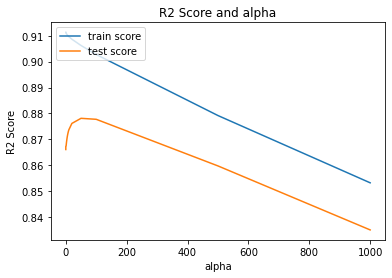

In [174]:
# plotting mean test and train scoes with alpha 
cv_results=pd.DataFrame(search.cv_results_)
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [175]:
ridge=Ridge()
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0,10,11,12,14,15,17,16,19,18,20]}

search=GridSearchCV(estimator=ridge,param_grid=params,n_jobs=-1,return_train_score=True,verbose=1,cv=5,scoring='r2')
search.fit(X_train,y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10, 11, 12, 14,
                                   15, 17, 16, 19, ...]},
             return_train_score=True, scoring='r2', verbose=1)

In [176]:
search.best_params_

{'alpha': 20}

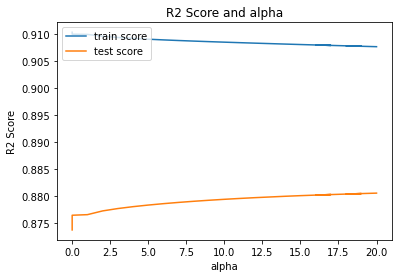

In [177]:
cv_results=pd.DataFrame(search.cv_results_)
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [178]:
rid=Ridge(alpha=9)
rid.fit(X_train,y_train)

Ridge(alpha=9)

In [179]:
y_pred=rid.predict(X_train)
y_test_pred=rid.predict(X_test)

In [180]:
r2_score(y_train,y_pred)

0.9058667409570511

In [181]:
r2_score(y_test,y_test_pred)

0.8565686098924084

Ridge picked 74 features and eliminated the other 0 features


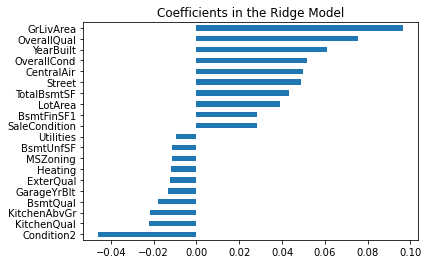

In [182]:
# Plot important coefficients
coefs = pd.Series(rid.coef_, index = X_train.columns)
print("Ridge picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Ridge Model")
plt.show()

In [183]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = rid.predict(X_train)
y_pred_test = rid.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric2.append(mse_test_lr**0.5)

0.9058667409570511
0.8565686098924084
11.726608585821964
9.357883641131421
0.012515057188710741
0.023278317515252292


In [184]:
from sklearn.linear_model import Lasso

In [185]:
lasso=Lasso()
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
cv=GridSearchCV(estimator=lasso,param_grid=params,n_jobs=-1,return_train_score=True,verbose=1,cv=5,scoring='r2')
cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='r2', verbose=1)

In [186]:
cv_re=pd.DataFrame(cv.cv_results_)

In [187]:
cv_re[['mean_train_score','mean_test_score','param_alpha']].sort_values(by='mean_test_score',ascending=False)

mean_train_score  mean_test_score param_alpha
1           0.907071         0.881937       0.001
2           0.891066         0.877371        0.01
0           0.910182         0.875308      0.0001
3           0.805029         0.793059        0.05
4           0.686689         0.674830         0.1
5           0.375769         0.360684         0.2
6           0.007784        -0.009933         0.3
7           0.000630        -0.013396         0.4
22          0.000000        -0.013624        10.0
20          0.000000        -0.013624         8.0
21          0.000000        -0.013624         9.0
26          0.000000        -0.013624         500
23          0.000000        -0.013624          20
24          0.000000        -0.013624          50
25          0.000000        -0.013624         100
18          0.000000        -0.013624         6.0
19          0.000000        -0.013624         7.0
14          0.000000        -0.013624         2.0
17          0.000000        -0.013624         5.0
16          0.000000        -0.013624         4.0
15          0.000000        -0.013624         3.0
13          0.000000        -0.013624         1.0
12          0.000000        -0.013624         0.9
11          0.000000        -0.013624         0.8
10          0.000000        -0.013624         0.7
9           0.000000        -0.013624         0.6
8           0.000000        -0.013624         0.5
27          0.000000        -0.013624        1000

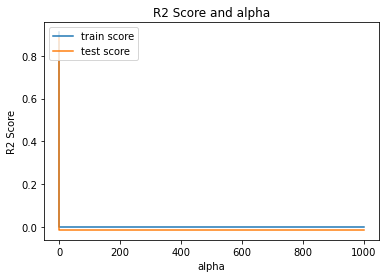

In [188]:
cv_results=pd.DataFrame(cv.cv_results_)
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('R2 Score')
plt.title("R2 Score and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

In [189]:
lasso1=Lasso(alpha=0.001)

In [190]:
lasso1.fit(X_train,y_train)

Lasso(alpha=0.001)

In [191]:
y_pred=lasso1.predict(X_train)
y_pred_test=lasso1.predict(X_test)

In [192]:
r2_score(y_train,y_pred)

0.9044425876511148

In [193]:
r2_score(y_test,y_pred_test)

0.8598466054955978

Lasso picked 58 features and eliminated the other 16 features


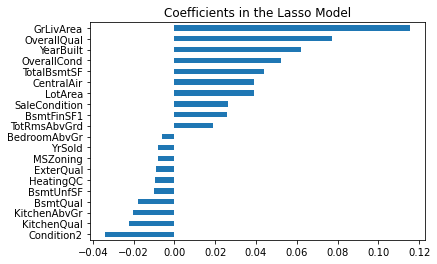

In [194]:
# Plot important coefficients
coefs = pd.Series(lasso1.coef_, index = X_train.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()

In [195]:
metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9058667409570511
0.8598466054955978
11.726608585821964
9.144017614958372
0.012515057188710741
0.022746312475020826


In [196]:
lr_table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(lr_table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final_metric = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final_metric

Metric  Linear Regression  Ridge Regression  Lasso Regression
0  R2 Score (Train)           0.907136          0.905867          0.905867
1   R2 Score (Test)           0.855558          0.856569          0.859847
2       RSS (Train)          11.568457         11.726609         11.726609
3        RSS (Test)           9.423837          9.357884          9.144018
4       MSE (Train)           0.111114          0.111871          0.111871
5        MSE (Test)           0.153109          0.152572          0.150819

In [197]:
betas = pd.DataFrame(index=X_train.columns)

In [198]:
betas.rows = X_train.columns

In [199]:
betas['Linear'] = lr.coef_
betas['Ridge'] = rid.coef_
betas['Lasso'] = lasso1.coef_

In [200]:
betas

Linear     Ridge     Lasso
MSSubClass     0.000750  0.000086  0.000000
MSZoning      -0.013036 -0.011559 -0.008056
LotFrontage    0.003863  0.003146  0.002133
LotArea        0.038366  0.039022  0.038883
Street         0.325985  0.048843  0.000000
LotShape      -0.003244 -0.003639 -0.003283
LandContour    0.008957  0.011192  0.005962
Utilities     -0.112166 -0.009776 -0.000000
LotConfig     -0.002459 -0.001987 -0.001718
LandSlope      0.025790  0.018052  0.001460
Neighborhood  -0.000487 -0.000453 -0.000264
Condition1    -0.002226 -0.004653 -0.003926
Condition2    -0.054992 -0.045835 -0.033971
BldgType       0.003590  0.003634  0.001420
HouseStyle     0.000068  0.000975  0.000271
OverallQual    0.074424  0.075402  0.077443
OverallCond    0.053134  0.051875  0.052259
YearBuilt      0.069311  0.060926  0.061921
YearRemodAdd   0.010735  0.013474  0.012306
RoofStyle     -0.000852 -0.000684 -0.000000
RoofMatl       0.010873  0.012059  0.010362
Exterior1st   -0.004990 -0.005292 -0.004324
Exterior2nd    0.004702  0.004529  0.003444
MasVnrType     0.012692  0.012437  0.008875
MasVnrArea     0.004288  0.005066  0.002916
ExterQual     -0.018112 -0.012608 -0.009029
ExterCond      0.000333  0.002200  0.000000
Foundation     0.016804  0.019350  0.016268
BsmtQual      -0.016546 -0.018113 -0.017911
BsmtCond       0.014944  0.013477  0.011104
BsmtExposure   0.000941  0.001159 -0.000000
BsmtFinType1   0.005760  0.005078  0.003060
BsmtFinSF1     0.028970  0.028445  0.025879
BsmtFinType2  -0.002343 -0.003612 -0.000000
BsmtFinSF2    -0.004558 -0.006665 -0.002563
BsmtUnfSF     -0.012055 -0.011470 -0.009796
TotalBsmtSF    0.039490  0.043130  0.044176
Heating       -0.017679 -0.012120 -0.000000
HeatingQC     -0.008928 -0.009592 -0.009659
CentralAir     0.051108  0.049715  0.039142
Electrical     0.001765  0.002978  0.002817
1stFlrSF      -0.003716  0.012724  0.001005
2ndFlrSF      -0.010857  0.007412 -0.000000
LowQualFinSF  -0.001069  0.000327 -0.000000
GrLivArea      0.121216  0.096412  0.115311
BsmtFullBath   0.015239  0.015416  0.015701
BsmtHalfBath   0.000281 -0.000119 -0.000000
FullBath       0.002376  0.004712  0.000105
HalfBath       0.000670  0.003068  0.000000
BedroomAbvGr  -0.009860 -0.008218 -0.006303
KitchenAbvGr  -0.022384 -0.021618 -0.020175
KitchenQual   -0.022533 -0.022160 -0.022377
TotRmsAbvGrd   0.024495  0.024603  0.018847
Functional     0.021152  0.020209  0.018437
Fireplaces     0.016082  0.016554  0.017256
GarageType     0.003600  0.003530  0.001808
GarageYrBlt   -0.017911 -0.013417 -0.003045
GarageFinish  -0.000711 -0.002358 -0.000961
GarageCars     0.017277  0.016916  0.017347
GarageArea     0.021113  0.019215  0.016401
GarageQual     0.001589  0.002601  0.000000
GarageCond     0.000050 -0.000706  0.000000
PavedDrive     0.008885  0.013022  0.005712
WoodDeckSF     0.007161  0.007040  0.005329
OpenPorchSF    0.005371  0.005737  0.004250
EnclosedPorch  0.012398  0.012819  0.010594
3SsnPorch      0.000596  0.000999  0.000000
ScreenPorch    0.012910  0.012673  0.012245
PoolArea      -0.002671 -0.002514 -0.001651
MiscVal        0.001641  0.001166  0.000000
MoSold         0.000805  0.001053  0.000397
YrSold        -0.008644 -0.009450 -0.007830
SaleType      -0.002628 -0.002956 -0.002137
SaleCondition  0.027538  0.028096  0.026180

In [213]:
X=X_train.drop(['GrLivArea', 'OverallQual','YearBuilt','OverallCond','TotalBsmtSF'],1)
X.shape

(937, 69)

In [214]:
lasso2=Lasso(alpha=0.001)

In [215]:
lasso2.fit(X,y_train)

Lasso(alpha=0.001)

In [216]:
y_pred=lasso1.predict(X_train)
y_pred_test=lasso1.predict(X_test)

In [217]:
metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print(r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print(r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print(rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print(rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print(mse_train_lr)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print(mse_test_lr)
metric3.append(mse_test_lr**0.5)

0.9058667409570511
0.8598466054955978
11.726608585821964
9.144017614958372
0.012515057188710741
0.022746312475020826


Lasso picked 59 features and eliminated the other 10 features


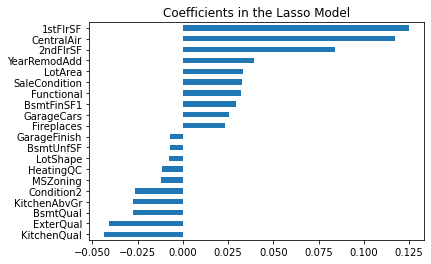

In [218]:
# Plot important coefficients
coefs = pd.Series(lasso2.coef_, index = X.columns)
print("Lasso picked " + str(sum(coefs != 0)) + " features and eliminated the other " +  \
      str(sum(coefs == 0)) + " features")
imp_coefs = pd.concat([coefs.sort_values().head(10),
                     coefs.sort_values().tail(10)])
imp_coefs.plot(kind = "barh")
plt.title("Coefficients in the Lasso Model")
plt.show()